<h2><font color="#004D7F" size=6>FASE: Procesamiento de datos</font></h2>


<h2><font color="#004D7F" size=6>TRANSFORMACIONES Y NUEVAS VISUALIZACIONES</font></h2>

<br><br>
<div style="text-align: left">
<font color="#004D7F" size=5>David Víctor Gómez Ramírez</font><br>
<font color="#004D7F" size=5>Predicción Métricas Stryd mediante modelo de Machine Learning</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [Introducción](#INTRODUCCION)
    * [Librerías y CSV](#CARGARDATOS)
* [Transformaciones](#TRANSFORMACIONES)
    * [Visualización Datos Originales](#VISORIGINALES)
    * [Escalamiento](#ESCALAMIENTO)
        * [Realizamos Escalamiento entre (0,1)](#REALESCALAMIENTO)
        * [Visualización Datos Escalados](#VISESCALAMIENTO)
    * [Estandarización](#ESTANDARIZACION)
        * [Realizamos Estandarización](#REALESTANDARIZACION)
        * [Visualización Datos Estandarizados](#VISESTANDARIZACION)
    * [Normalización](#NORMALIZACION)
        * [Realizamos Normalización](#REALNORMALIZACION)
        * [Visualización Datos Normalizados](#VISNORMALIZACION)
    * [Visualización Datos Originales, Escalados, Esntandarizados y Normalizados](#VISTODOS)
        * [Grupo 1: POR_CP, DISTANCIA, RITMO, FREC_CARDIACA Y CADENCIA](#VISGRUPO1)
        * [Grupo 2: TSC, FP, LSS, OSC_VERTICAL Y L_ZANCADA](#VISGRUPO2)
        * [Grupo 3: RFP, RLSS, ROV, RE y AIRE](#VISGRUPO3)
        * [Grupo 4: PENDIENTE, DESNIVEL, ALTITUD, RSS y DURACION](#VISGRUPO4)
    * [Estudio del Sesgo](#SESGO)
        * [Transformaciones Box-Cox](#BOXCOX)
        * [Transformaciones Yeo-Johnson](#YEOJOHNSON)
    * [CONCATENAR DF: df_features_boxcox, df_features_yeojohnson,df_sinsesgo e Y](#CONCATENAR)
    * [Nueva Visualización _"POR_CP"_](#POR_CP)
    * [Nueva Visualización _"DISTANCIA"_](#DISTANCIA)
    * [Nueva Visualización _"RITMO"_](#RITMO)
    * [Nueva Visualización _"FREC_CARDIACA"_](#FREC_CARDIACA)
    * [Nueva Visualización _"CADENCIA"_](#CADENCIA)
    * [Nueva Visualización _"TSC"_](#TSC)
    * [Nueva Visualización _"FP"_](#FP)
    * [Nueva Visualización _"LSS"_](#LSS)
    * [Nueva Visualización _"OSC_VERTICAL"_](#OSC_VERTICAL)
    * [Nueva Visualización _"L_ZANCADA"_](#L_ZANCADA)
    * [Nueva Visualización _"RFP"_](#RFP)
    * [Nueva Visualización _"RLSS"_](#RLSS)
    * [Nueva Visualización _"ROV"_](#ROV)
    * [Nueva Visualización _"RE"_](#RE)
    * [Nueva Visualización _"AIRE"_](#AIRE)
    * [Nueva Visualización _"PENDIENTE"_](#PENDIENTE)
    * [Nueva Visualización _"ALTITUD"_](#ALTITUD)
    * [Nueva Visualización _"DESNIVEL"_](#DESNIVEL)
    * [Nueva Visualización _"RSS"_](#RSS)
    * [Nueva Visualización _"DURACION"_](#DURACION)

<a id="INTRODUCCION"></a>
# <font color="#004D7F">Introducción</font>

Los datos en bruto, sin analizar de antemano, muy difícilmente nos va a dar precisiones robustas ya que, entre otros aspectos, muchos de ellos requieren los datos en una forma específica, por lo que deberemos realizar una transformación del conjunto de datos. Por otro lado, otros algoritmos pueden funcionar mejor si los datos se preparan de una manera específica, por ejemplo, los de tipo árbol con atributos característica de tipo nominal. Por tanto, es de vital importancia realizar un preprocesamiento a nuestro datos como parte fundamental de realizar un proyecto de machine learning.

<a id="CARGARDATOS"></a>
## <font color="#004D7F">Librerías y CSV</font>

Para esta práctica vamos a cargar nuestro conjunto de datos de "Métricas Stryd" `(SEGMENTOS_csv.csv)` y trabajar diferentes tipos de transformaciones de datos. Así mismo, en algunas de ellas veremos el impacto de estas transformacionesamos.

Por otro lado, en cuanto a las librerías, vamos a ver llamarlas según cada transformación. La mayoría de estas tranformaciones las trabajaremos con la librería **Scikit-learn**.

In [1]:
# ******************************************************************************
# ***************              LIBRERÍAS A IMPORTAR              ***************
# ******************************************************************************
import pandas                       as pd
import matplotlib.pyplot            as plt
import pandas                       as pd
import numpy                        as np
import seaborn                      as sns
import matplotlib.pyplot as plt
import seaborn as sns
# ******************************************************************************
# ***************           CARGAMOS NUESTRO DATAFRAME           ***************
# ******************************************************************************
# Cargamos los datos contenidos en "SEGMENTOS_csv.csv"
data = pd.read_csv('SEGMENTOS_csv.csv')
# Completamos los datos nulos con la media de cada uno
data['DESNIVEL']        = data['DESNIVEL'].fillna(data['DESNIVEL'].median())
X = data.drop(["DURACION"], axis=1)
Y = data["DURACION"]

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>


<a id="TRANSFORMACIONES"></a>
# <font color="#004D7F">Transformaciones</font>

El método de ajuste y transformación múltiple será nuestro enfoque preferido. Por un lado tenemos la función `fit()` para preparar los parámetros de la transformación una vez en sus datos. Luego, por otro lado la función `transform()` en los mismos datos para prepararlos para el modelado y nuevamente en el conjunto de datos de prueba o validación o los nuevos datos que puede ver en el futuro. El ajuste y transformación combinados es una conveniencia que puede usar para tareas únicas. Esto puede ser útil si está interesado en trazar o resumir los datos transformados y se utilizará la función `fit_transform()`. Podemos revisar la API [**sklearn.preprocessing**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). Como vemos existe una gran cantidad de funciones que podemos aplicar en esta fase de preprocesamiento según la necesidad de nuestros datos.

Es importante ver como quedan los datos antes y después de transformarlos. En el siguiente código puede ver como quedan los datos originales y comparArlos con cada transformación.

<a id="VISORIGINALES"></a>
## <font color="#004D7F">Visualización Datos Originales</font>

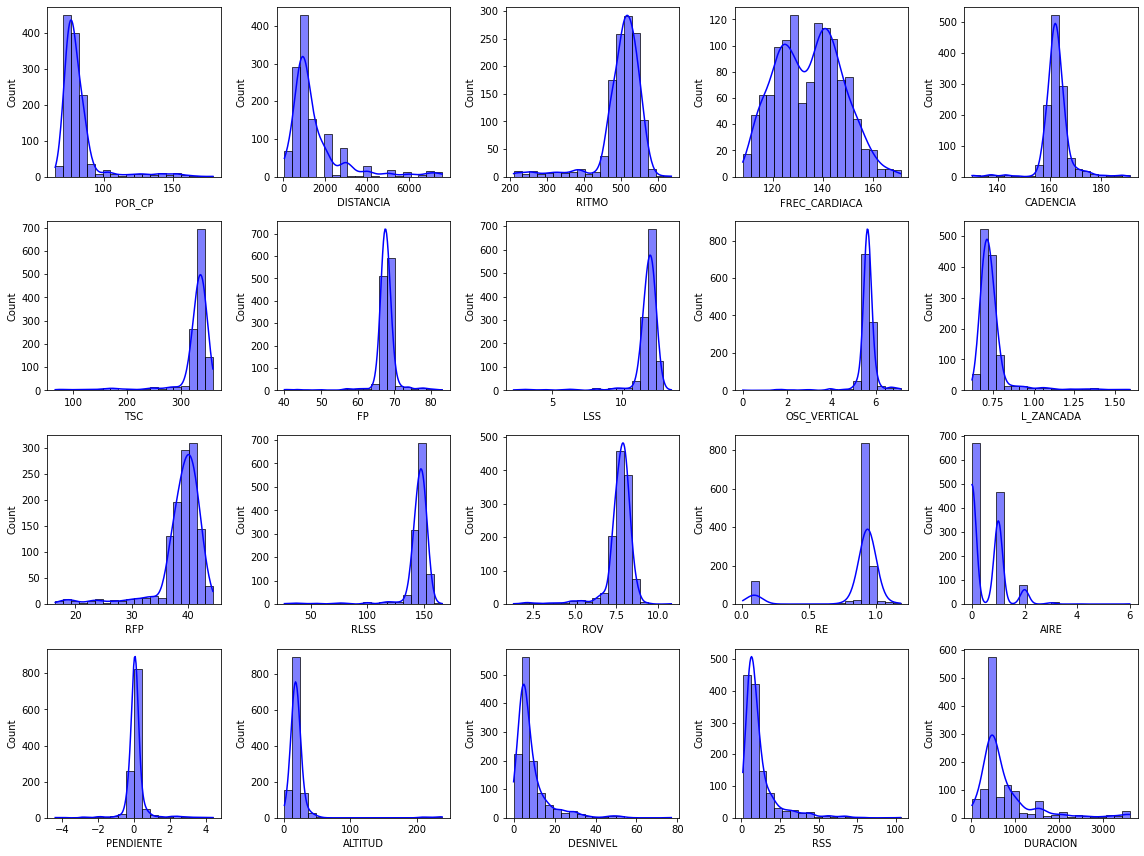

In [3]:
# **********************************************************************************
# *******************              VISUALIZACIONES               *******************
# **********************************************************************************
#   HISTOGRAMAS O DISTRIBUCIÓN CON DENSIDAD
f, axes = plt.subplots(4,5, figsize =(16,12))
sns.histplot(data["POR_CP"],        ax= axes [0,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["DISTANCIA"],     ax= axes [0,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["RITMO"],         ax= axes [0,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["FREC_CARDIACA"], ax= axes [0,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["CADENCIA"],      ax= axes [0,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["TSC"],           ax= axes [1,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["FP"],            ax= axes [1,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["LSS"],           ax= axes [1,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["OSC_VERTICAL"],  ax= axes [1,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["L_ZANCADA"],     ax= axes [1,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["RFP"],           ax= axes [2,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["RLSS"],          ax= axes [2,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["ROV"],           ax= axes [2,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["RE"],            ax= axes [2,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["AIRE"],          ax= axes [2,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["PENDIENTE"],     ax= axes [3,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["ALTITUD"],       ax= axes [3,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["DESNIVEL"],      ax= axes [3,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["RSS"],           ax= axes [3,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["DURACION"],      ax= axes [3,4],kde = True, bins = 20, color="Blue", fill=True)

plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

<a id="ESCALAMIENTO"></a>
## <font color="#004D7F">Escalamiento</font>

Esta transformación es útil para los algoritmos de optimización utilizados en el núcleo de los algoritmos de aprendizaje automático como Gradiente Descendiente. También es útil para algoritmos que ponderan entradas como Regression y Neural Networks y algoritmos que usan medidas de distancia como _k_-Nearest Neighbours. Puede reescalar sus datos usando la clase [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). 

Después de reescalar puede ver que todos los valores están en el rango $[0,1]$.

**¿Por qué y dónde aplicar la escala de funciones?** 

El conjunto de datos del mundo real contiene características que varían mucho en magnitudes, unidades y rango. La normalización se debe realizar cuando la escala de una característica es irrelevante o engañosa y no se debe normalizar cuando la escala es significativa.

Los algoritmos que utilizan la medida de distancia euclidiana son sensibles a las magnitudes. Aquí, el escalado de características ayuda a sopesar todas las características por igual.

Formalmente, si una característica en el conjunto de datos es de gran escala en comparación con otras, en los algoritmos en los que se mide la distancia euclidiana, esta característica de gran escala se vuelve dominante y debe normalizarse.


Ejemplos de algoritmos donde la escala de características importa.\
* **1. K-Means:** usa la medida de distancia euclidiana aquí, la escala de características importa.\
* **2. K-Neighbors-Neighbors:** también requiere escalado de características.\
* **3. Análisis de componentes principales(PCA):** intenta obtener la característica con la máxima varianza, aquí también se requiere la escala de características.\
* **4. Descenso de gradiente** la velocidad de cálculo aumenta a medida que el cálculo Theta se vuelve más rápido después de la escala de características.

<a id="REALESCALAMIENTO"></a>
### <font color="#004D7F">Realizamos Escalamiento entre (0,1)</font>

In [4]:
# ESCALAMOS (entre 0 y 1)
# importamos librería
from sklearn.preprocessing import MinMaxScaler

# escalamos y transformamos
scaler = MinMaxScaler(feature_range=(0,1))
datos_escalados = scaler.fit_transform(data)
np.set_printoptions(precision=4)

print(datos_escalados)

[[0.1822 0.0596 0.7243 ... 0.026  0.0392 0.067 ]
 [0.173  0.1258 0.7897 ... 0.0909 0.0882 0.1475]
 [0.1684 0.1258 0.7664 ... 0.0519 0.0784 0.1447]
 ...
 [0.0994 0.1258 0.6963 ... 0.0649 0.049  0.1363]
 [0.0759 0.1258 0.736  ... 0.0519 0.0392 0.1408]
 [0.0486 0.0927 0.7664 ... 0.0649 0.0294 0.1075]]


 <a id="VISESCALAMIENTO"></a>
### <font color="#004D7F">Visualización datos Escalados</font>

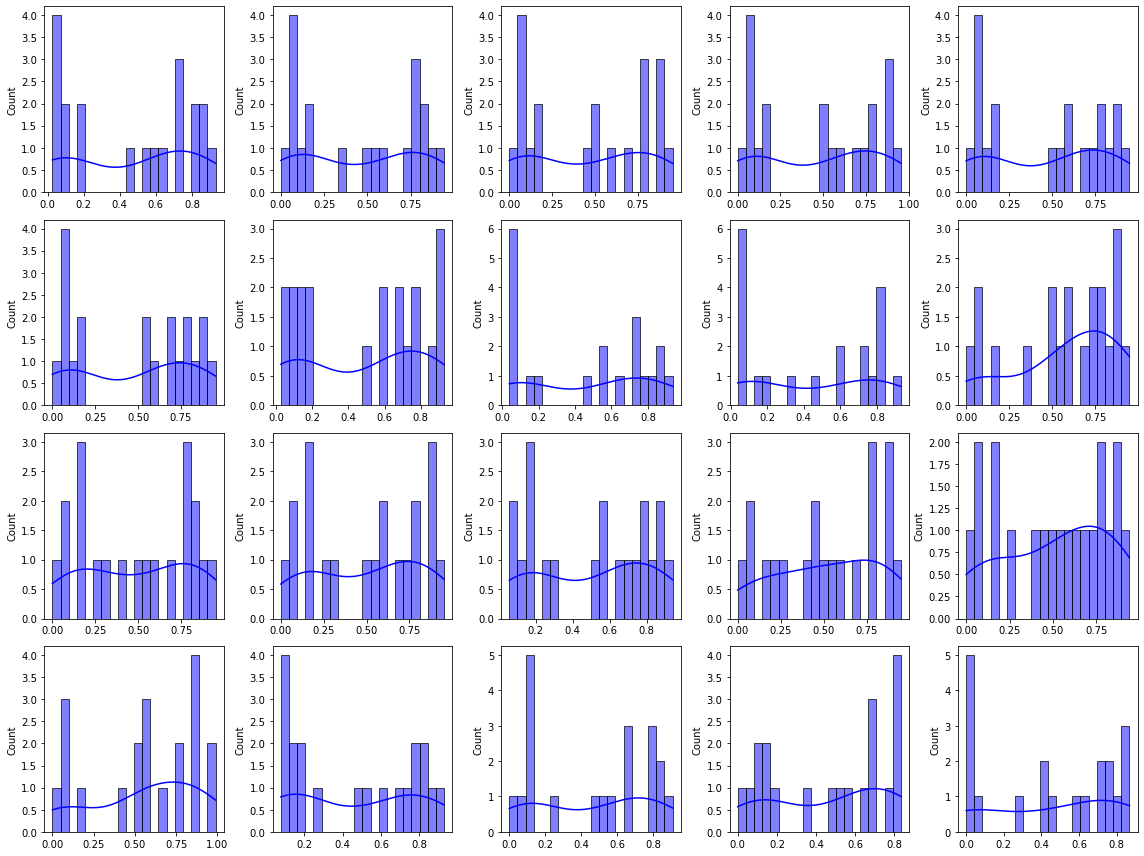

In [6]:
# **********************************************************************************
# *******************              VISUALIZACIONES               *******************
# **********************************************************************************
#   HISTOGRAMAS O DISTRIBUCIÓN CON DENSIDAD
f, axes = plt.subplots(4,5, figsize =(16,12))
sns.histplot(datos_escalados[0],  ax= axes [0,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[1],  ax= axes [0,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[2],  ax= axes [0,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[3],  ax= axes [0,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[4],  ax= axes [0,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[5],  ax= axes [1,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[6],  ax= axes [1,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[7],  ax= axes [1,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[8],  ax= axes [1,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[9],  ax= axes [1,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[10], ax= axes [2,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[11], ax= axes [2,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[12], ax= axes [2,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[13], ax= axes [2,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[14], ax= axes [2,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[15], ax= axes [3,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[16], ax= axes [3,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[17], ax= axes [3,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[18], ax= axes [3,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_escalados[19], ax= axes [3,4],kde = True, bins = 20, color="Blue", fill=True)

plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="ESTANDARIZACION"></a>
## <font color="#004D7F">Estandarización</font>

Es más adecuada para técnicas que asumen una distribución gaussiana en las variables de entrada y funcionan mejor con datos reescalados, como Linear Regression, Logistic Regression y Linear Discriminant Analysis. Puede estandarizar datos utilizando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Los valores para cada atributo ahora tienen un valor medio de $0$ y una desviación estándar de $1$.\
Cuando tengamos mucha varianza en los diferentes atributosde un conjunto de datos. 
Por ejemplo:
* Edad tiene 2 dígitos y sueldo 5 o más dígitos.
* El modelo le otorgará más importancia a salario que a edad.
* Por tanto, debemos unificar las diferentes variables.

<a id="REALESTANDARIZACION"></a>
### <font color="#004D7F">Realizamos Estandarización</font>

In [15]:
# ESTANDARIZAMOS
# importamos librería necesaria
from sklearn.preprocessing import StandardScaler

# estandarizamos y transformamos
scaler = StandardScaler().fit(data)
datos_estandarizados = scaler.transform(data)
np.set_printoptions(precision=4)

print(datos_estandarizados)

[[ 0.2638 -0.7485  0.2907 ... -0.7751 -0.5924 -0.7473]
 [ 0.1932 -0.3807  0.7632 ... -0.1886 -0.1454 -0.3274]
 [ 0.1579 -0.3807  0.5944 ... -0.5405 -0.2348 -0.342 ]
 ...
 [-0.3711 -0.3807  0.0881 ... -0.4232 -0.503  -0.3857]
 [-0.5508 -0.3807  0.375  ... -0.5405 -0.5924 -0.3624]
 [-0.7605 -0.5646  0.5944 ... -0.4232 -0.6818 -0.5359]]


  <a id="VISESTANDARIZACION"></a>
### <font color="#004D7F">Visualización datos Estandarizados</font>

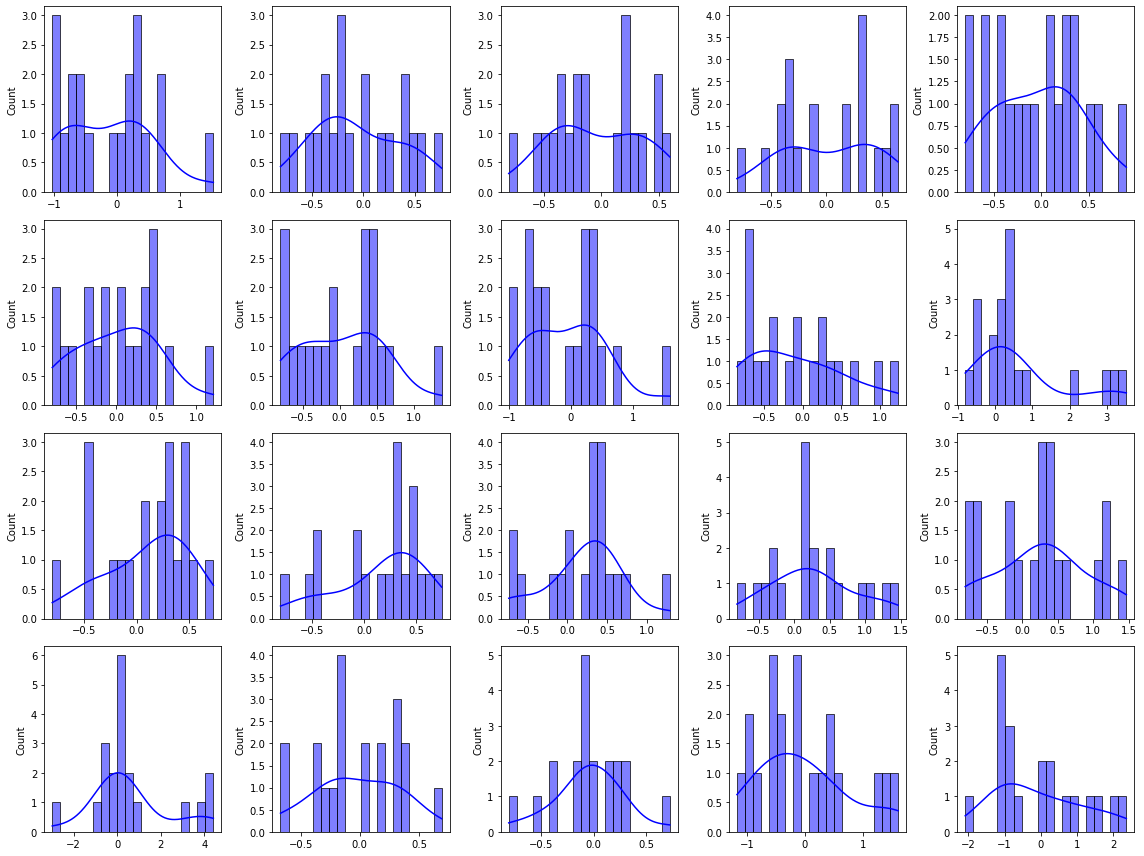

In [16]:
# **********************************************************************************
# *******************              VISUALIZACIONES               *******************
# **********************************************************************************
#   HISTOGRAMAS O DISTRIBUCIÓN CON DENSIDAD
f, axes = plt.subplots(4,5, figsize =(16,12))
sns.histplot(datos_estandarizados[0],  ax= axes [0,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[1],  ax= axes [0,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[2],  ax= axes [0,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[3],  ax= axes [0,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[4],  ax= axes [0,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[5],  ax= axes [1,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[6],  ax= axes [1,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[7],  ax= axes [1,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[8],  ax= axes [1,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[9],  ax= axes [1,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[10], ax= axes [2,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[11], ax= axes [2,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[12], ax= axes [2,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[13], ax= axes [2,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[14], ax= axes [2,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[15], ax= axes [3,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[16], ax= axes [3,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[17], ax= axes [3,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[18], ax= axes [3,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_estandarizados[19], ax= axes [3,4],kde = True, bins = 20, color="Blue", fill=True)

plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="NORMALIZACION"></a>
## <font color="#004D7F">Normalización</font>

Este método de preprocesamiento puede ser útil para conjuntos de datos dispersos (muchos ceros) con atributos de escalas variables cuando se utilizan algoritmos que ponderan valores de entrada como Neural Networks y algoritmos que usan medidas de distancia como k-Nearest Neighbours.

Puede normalizar datos en Python con la clase [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html). Las filas están normalizadas a la longitud $1$

<a id="REALNORMALIZACION"></a>
### <font color="#004D7F">Realizamos Normalización</font>

In [17]:
# NORMALIZAMOS
# importamos librería necesaria
from sklearn.preprocessing import Normalizer

# normalizamos y transformamos
scaler = Normalizer().fit(data)
datos_normalizados = scaler.transform(data)
np.set_printoptions(precision=4)

print(datos_normalizados)

[[0.0967 0.5631 0.5845 ... 0.0023 0.0056 0.2917]
 [0.0633 0.7468 0.4085 ... 0.0052 0.0075 0.4085]
 [0.0632 0.7502 0.4029 ... 0.003  0.0068 0.4029]
 ...
 [0.0585 0.7656 0.3882 ... 0.0038 0.0046 0.3882]
 [0.0559 0.7577 0.397  ... 0.003  0.0038 0.3963]
 [0.0643 0.6825 0.4887 ... 0.0046 0.0036 0.3677]]


  <a id="VISNORMALIZACION"></a>
### <font color="#004D7F">Visualización datos Normalizados</font> 

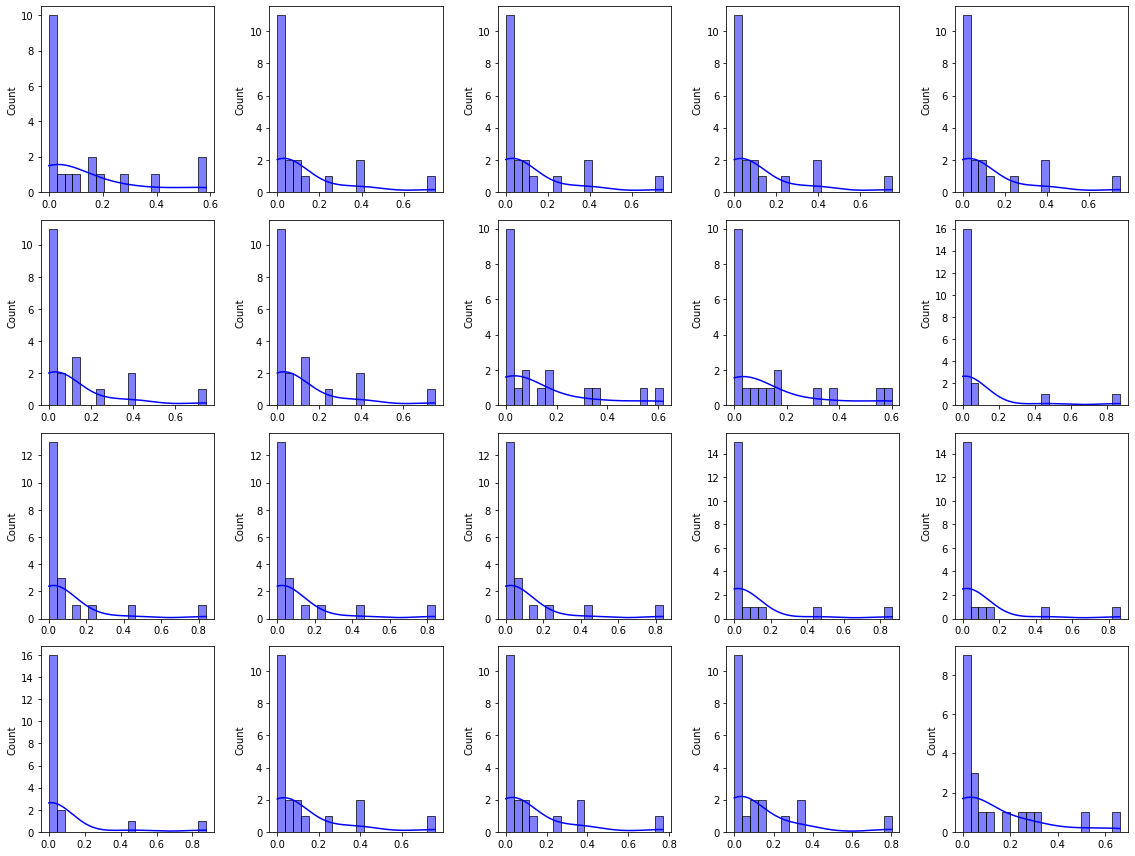

In [18]:
# **********************************************************************************
# *******************              VISUALIZACIONES               *******************
# **********************************************************************************
#   HISTOGRAMAS O DISTRIBUCIÓN CON DENSIDAD
f, axes = plt.subplots(4,5, figsize =(16,12))
sns.histplot(datos_normalizados[0],  ax= axes [0,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[1],  ax= axes [0,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[2],  ax= axes [0,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[3],  ax= axes [0,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[4],  ax= axes [0,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[5],  ax= axes [1,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[6],  ax= axes [1,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[7],  ax= axes [1,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[8],  ax= axes [1,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[9],  ax= axes [1,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[10], ax= axes [2,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[11], ax= axes [2,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[12], ax= axes [2,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[13], ax= axes [2,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[14], ax= axes [2,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[15], ax= axes [3,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[16], ax= axes [3,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[17], ax= axes [3,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[18], ax= axes [3,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(datos_normalizados[19], ax= axes [3,4],kde = True, bins = 20, color="Blue", fill=True)

plt.tight_layout()
plt.show()

 
 <a id="VISTODOS"></a>
## <font color="#004D7F">Visualización todos los datos (Originales, Escalados, Estandarizados y Normalizados</font>

A efectos prácticos simplemente hemos realizados unas transformaciones básicas y vamos a visualizar el impacto que     han tenido en nuestros datos.

Obviamente deberemos tener en cuenta, que según la distribución, sesgo y otras tantas métricas y características, haremos unas u otras o incluso una combinación de ellas. Por lo que el objetivo principal es visualizar el impacto visual.

**¡¡OJO!!** No debemos olvidar que estamos tratando de una ciencia empírica por lo que si vemos u obtenemos una información inesperada mediante esta acción, bienvenida sea.

Para una menjor y clara visualización lo haremos por grupo de 5 características o atributos.

 <a id="VISGRUPO1"></a>
#### <font color="#004D7F">Grupo 1: POR_CP, DISTANCIA, RITMO, FREC_CARDIACA Y CADENCIA</font>

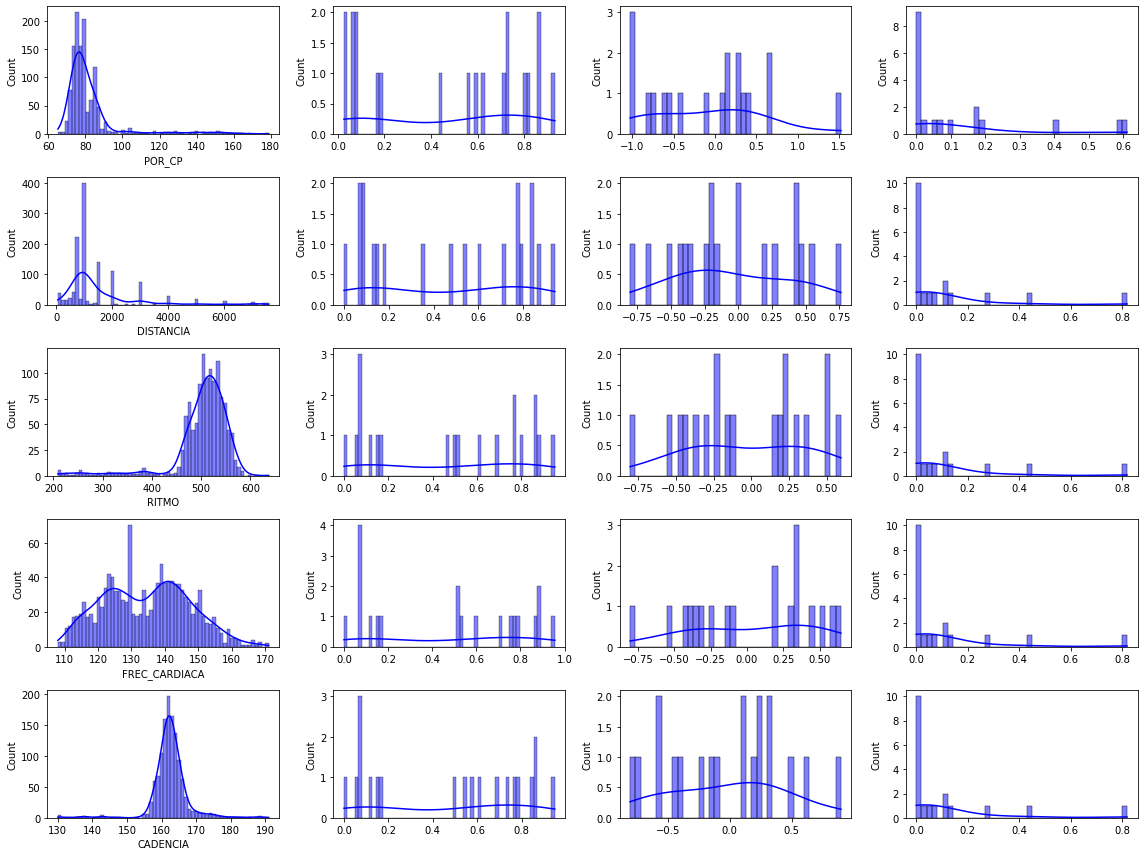

In [19]:
# **********************************************************************************
# **********  Grupo 1 POR_CP, DISTANCIA, RITMO, FREC_CARDIACA Y CADENCIA  **********
# **********************************************************************************
#   HISTOGRAMAS Y DISTRIBUCIÓN CON DENSIDAD

f, axes = plt.subplots(5,4, figsize =(16,12))
sns.histplot(data["POR_CP"],          ax= axes [0,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[0],      ax= axes [0,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[0], ax= axes [0,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[0],   ax= axes [0,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["DISTANCIA"],       ax= axes [1,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[1],      ax= axes [1,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[1], ax= axes [1,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[1],   ax= axes [1,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["RITMO"],           ax= axes [2,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[2],      ax= axes [2,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[2], ax= axes [2,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[2],   ax= axes [2,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["FREC_CARDIACA"],   ax= axes [3,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[3],      ax= axes [3,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[3], ax= axes [3,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[3],   ax= axes [3,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["CADENCIA"],        ax= axes [4,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[4],      ax= axes [4,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[4], ax= axes [4,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[4],   ax= axes [4,3],kde = True, bins = 40, color="Blue", fill=True)

plt.tight_layout()
plt.show()

 <a id="VISGRUPO2"></a>
#### <font color="#004D7F">Grupo 2: TSC, FP, LSS, OSC_VERTICAL Y L_ZANCADA</font>

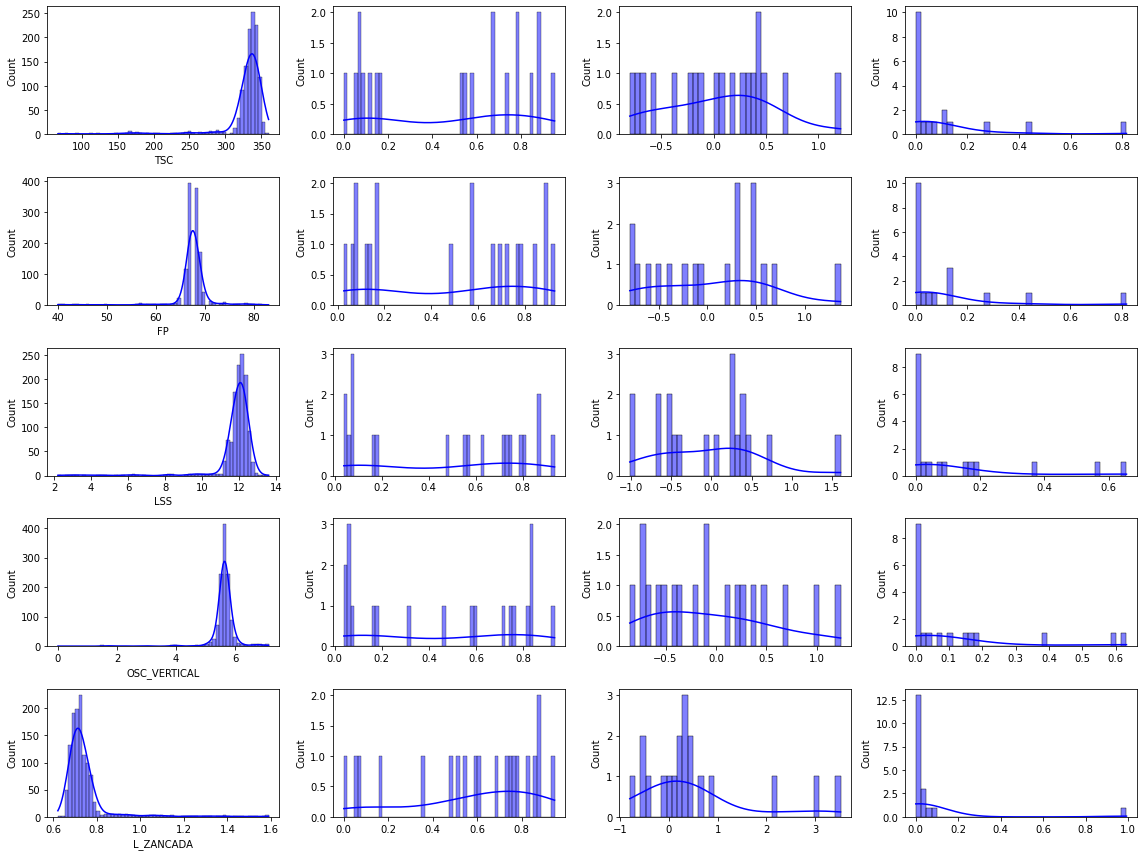

In [20]:
# **********************************************************************************
# ****************  Grupo 2 TSC, FP, LSS, OSC_VERTICAL Y L_ZANCADA  ****************
# **********************************************************************************
#   HISTOGRAMAS Y DISTRIBUCIÓN CON DENSIDAD

f, axes = plt.subplots(5,4, figsize =(16,12))
sns.histplot(data["TSC"],             ax= axes [0,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[5],      ax= axes [0,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[5], ax= axes [0,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[5],   ax= axes [0,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["FP"],              ax= axes [1,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[6],      ax= axes [1,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[6], ax= axes [1,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[6],   ax= axes [1,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["LSS"],             ax= axes [2,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[7],      ax= axes [2,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[7], ax= axes [2,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[7],   ax= axes [2,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["OSC_VERTICAL"],    ax= axes [3,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[8],      ax= axes [3,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[8], ax= axes [3,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[8],   ax= axes [3,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["L_ZANCADA"],       ax= axes [4,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[9],      ax= axes [4,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[9], ax= axes [4,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[9],   ax= axes [4,3],kde = True, bins = 40, color="Blue", fill=True)

plt.tight_layout()
plt.show()

 <a id="VISGRUPO3"></a>
#### <font color="#004D7F">Grupo 3: RFP, RLSS, ROV, RE y AIRE</font>

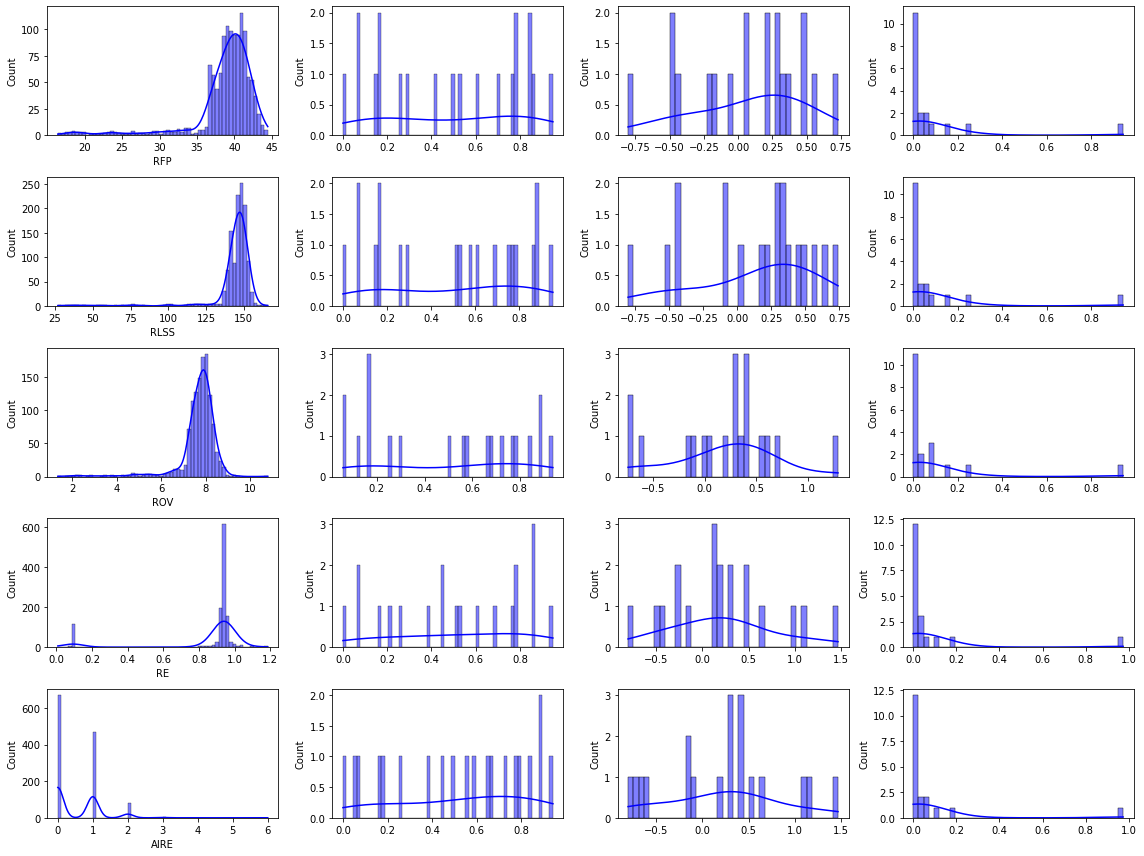

In [21]:
# **********************************************************************************
# ****************        Grupo 3 RFP, RLSS, ROV, RE y AIRE         ****************
# **********************************************************************************
#   HISTOGRAMAS Y DISTRIBUCIÓN CON DENSIDAD

f, axes = plt.subplots(5,4, figsize =(16,12))
sns.histplot(data["RFP"],              ax= axes [0,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[10],      ax= axes [0,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[10], ax= axes [0,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[10],   ax= axes [0,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["RLSS"],             ax= axes [1,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[11],      ax= axes [1,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[11], ax= axes [1,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[11],   ax= axes [1,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["ROV"],              ax= axes [2,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[12],      ax= axes [2,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[12], ax= axes [2,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[12],   ax= axes [2,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["RE"],               ax= axes [3,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[13],      ax= axes [3,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[13], ax= axes [3,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[13],   ax= axes [3,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["AIRE"],             ax= axes [4,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[14],      ax= axes [4,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[14], ax= axes [4,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[14],   ax= axes [4,3],kde = True, bins = 40, color="Blue", fill=True)

plt.tight_layout()
plt.show()

 <a id="VISGRUPO4"></a>
#### <font color="#004D7F">Grupo 4: PENDIENTE, DESNIVEL, ALTITUD, RSS y DURACION</font>

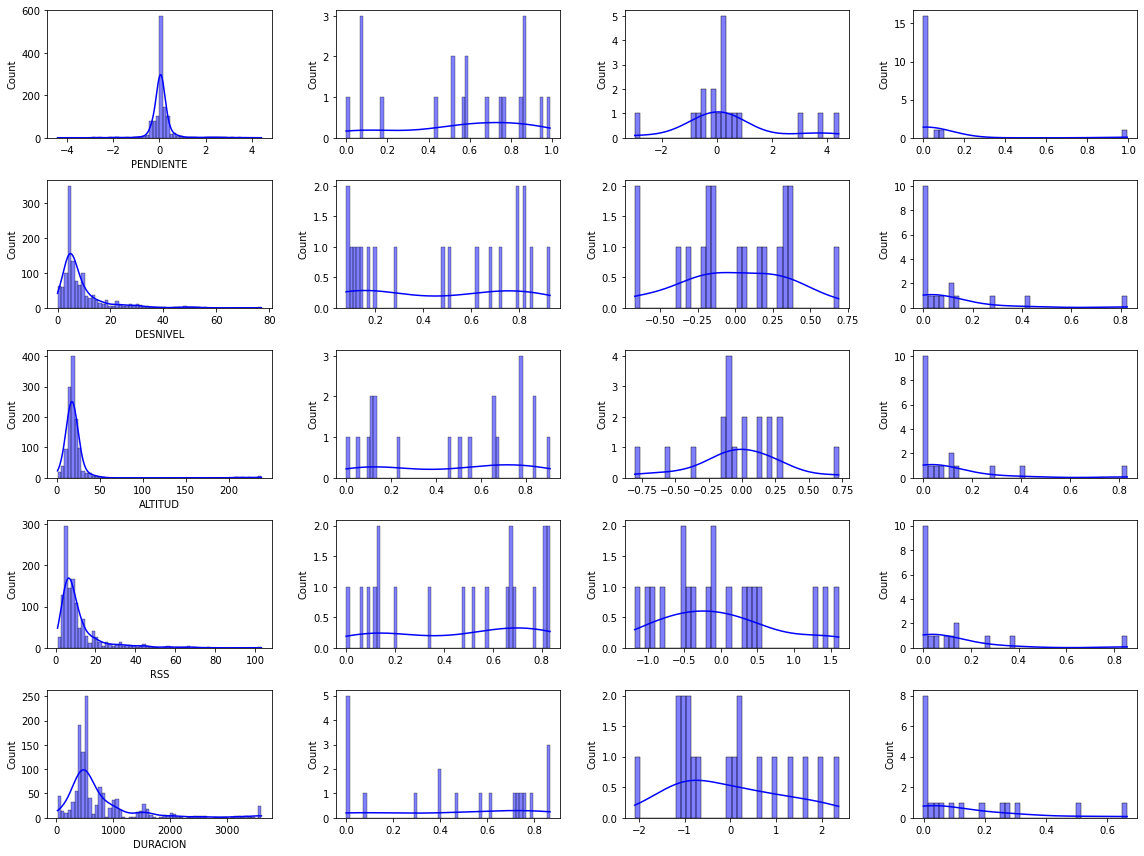

In [22]:
# **********************************************************************************
# ****************   PENDIENTE, DESNIVEL, ALTITUD, RSS y DURACION   ****************
# **********************************************************************************
#   HISTOGRAMAS Y DISTRIBUCIÓN CON DENSIDAD

f, axes = plt.subplots(5,4, figsize =(16,12))
sns.histplot(data["PENDIENTE"],        ax= axes [0,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[15],      ax= axes [0,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[15], ax= axes [0,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[15],   ax= axes [0,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["DESNIVEL"],         ax= axes [1,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[16],      ax= axes [1,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[16], ax= axes [1,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[16],   ax= axes [1,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["ALTITUD"],          ax= axes [2,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[17],      ax= axes [2,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[17], ax= axes [2,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[17],   ax= axes [2,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["RSS"],              ax= axes [3,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[18],      ax= axes [3,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[18], ax= axes [3,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[18],   ax= axes [3,3],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(data["DURACION"],         ax= axes [4,0],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_escalados[19],      ax= axes [4,1],kde = True, bins = 60, color="Blue", fill=True)
sns.histplot(datos_estandarizados[19], ax= axes [4,2],kde = True, bins = 40, color="Blue", fill=True)
sns.histplot(datos_normalizados[19],   ax= axes [4,3],kde = True, bins = 40, color="Blue", fill=True)

plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

 <a id="SESGO"></a>
## <font color="#004D7F">Estudio del Sesgo</font>

En las tranformaciones anteriores hemos visto como funcionan cada una de ellas **_(escalamiento, estandarización y normalización)_** pero a la hora de trazar una estrategia para la creación de un modelo robusto de regresión, como en el que nos encontramos, eliminaremos en primer lugar el sesgo si lo hubiere en las características de nuestro modelo principal. La clase a predecir **`DURACION`** no estará incluida pues es la razón de nuestro modelo predictivo de ML.\
En ocasiones los atributos representan el llamado sesgo o inclinación, que es cuando un atributo tiene una distribución similar a la Gaussiana pero esta se encuentra desplazada. Para este tipo de casos, se utiliza la transformación Box-Cox, la cual asume que todos los valores son positivos, que lo que realiza es el sesgo y hacer más Gaussiana la distribución de este atributo. 

In [113]:
X.skew()

POR_CP           3.489246
DISTANCIA        2.528064
RITMO           -2.614981
FREC_CARDIACA    0.128133
CADENCIA        -0.668538
TSC             -3.947314
FP              -3.108333
LSS             -5.287459
OSC_VERTICAL    -4.790635
L_ZANCADA        4.189054
RFP             -2.869902
RLSS            -5.287413
ROV             -3.457346
RE              -2.589064
AIRE             1.365827
PENDIENTE        1.253629
ALTITUD          8.091770
DESNIVEL         2.815657
RSS              3.014004
dtype: float64

Despúes de aplicar a nuestro conjunto de datos la función `X.skew()` y, en función a los datos obtenidos podríamos descartar **`FREC_CARDIACA`** al tener unos valores de sesgo ínfimos o muy pequeños e incluso a **`CADENCIA`** aunque tenga un valor un poco más elevado. En conclusión, y esto empieza tomar forma, partiendo de las 20 características iniciales deberemos eliminar el sesgo de "tan sólo" 17 de ellas, excepto: 
* **`DURACION`**: por trataerse de nuestra clase a predecir. 
* **`FREC_CARDIACA`**: por tener un sesgo casi nulo (0.128133). 
* **`CADENCIA`**: por tener un valor de sesgo bajo (-0.668538). _Podría tener mayor impacto del esperado_

In [20]:
# Características sin sesgo
features_sinsesgo =["FREC_CARDIACA","CADENCIA"]

# Crearemos dataframe con las características sin sesgo y sin clase a predecir
df_sinsesgo =data[["FREC_CARDIACA","CADENCIA"]]

# Crearemos dataframe con las características con sesgo y sin clase a predecir
df_consesgo = data.drop(features_sinsesgo, axis=1)

# Visualizaremos algunos datos de algunas métricas
df_consesgo.describe()

,POR_CP,DISTANCIA,RITMO,TSC,FP,LSS,OSC_VERTICAL,L_ZANCADA,RFP,RLSS,ROV,RE,AIRE,PENDIENTE,ALTITUD,DESNIVEL,RSS,DURACION
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,81.949606,1517.453214,501.777055,325.179007,67.505289,11.816762,5.594915,0.749273,38.749317,144.106313,7.676790,0.856816,0.537836,0.082425,20.847844,8.607811,11.626526,771.563059
std,14.843470,1359.907645,59.278623,41.207236,3.472228,1.186280,0.521518,0.121128,4.314841,14.466858,0.860692,0.256163,0.670147,0.580324,22.845511,8.528882,11.190080,686.143498
min,65.137000,50.000000,209.000000,67.000000,40.000000,2.200000,0.000980,0.622000,16.422000,26.829000,1.342000,0.008000,0.000000,-4.400000,1.000000,0.000000,1.000000,19.000000
25%,74.770000,800.000000,489.000000,328.000000,67.000000,11.700000,5.540000,0.697000,38.068000,142.682000,7.486000,0.925000,0.000000,-0.100000,15.000000,4.000000,6.000000,411.000000
50%,77.981000,1000.000000,513.000000,336.000000,68.000000,12.000000,5.640000,0.721000,39.759000,146.341000,7.830000,0.938000,0.000000,0.000000,18.000000,6.000000,8.000000,520.000000
75%,83.944000,1500.000000,535.000000,342.000000,68.000000,12.300000,5.730000,0.753000,41.040000,150.000000,8.085000,0.947000,1.000000,0.200000,21.000000,10.000000,13.000000,817.000000
max,178.899000,7600.000000,637.000000,360.000000,83.000000,13.600000,7.120000,1.589000,44.444000,165.853000,10.787000,1.186000,6.000000,4.400000,238.000000,77.000000,103.000000,3599.000000


Como hemos podido observar anteriormente, la mayoría de nuestras características disponen de sesgo (excepto FREC_CARDIACA y CADENCIA), para eleminar el sesgo del resto de las características disponemos de dos métodos diferentes _**(`Box-Cox y Yeo-Jonhson`)**_, con la particularidad que Box-Cox es para valores positivos y Yeo-Jonhson para los que poseen valores negativos.
Mediante la función **`describe()`**, veremos que la única caraterística que posee valores negativos, observados en **min** y en percentil del **25%** es **`PENDIENTE`**. Poor otro lado deberemos tener cuidadado con las características **`AIRE`** y **`DESNIVEL`** pues parece que las transformación Box-Cox las rechaza por tener valores negativos.

En relación a los datos obtenidos y eliminados anteriormente deberemos proceder de la siguiente forma:
* **Características a aplicar Box-Cox:** POR_CP, DISTANCIA, RITMO, TSC, FP, LSS, OSC_VERTICAL, L_ZANCADA, RFP, RLSS, ROV, RE,  ALTITUD y RSS.
* **Características a aplicar Yeo-Jonhson:** AIRE, PENDIENTE y DESNIVEL.

<a id="BOXCOX"></a>
### <font color="#004D7F">Transformaciones Box-Cox</font>

Como vemos, ese sesgo tenemos que corregirlo y para ello utilizaremos la clase [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html). Una vez realizada la transformación podemos ver como se encuentra corregido el sesgo inicial de ambas características.

In [23]:
# Transformación Box-Cox
# Importamos librería para transformación
from sklearn.preprocessing import PowerTransformer

# Denominación características con sesgo y valores positivos
df_sesgo_boxcox = data[['POR_CP','DISTANCIA','RITMO','TSC','FP','LSS','OSC_VERTICAL',
                  'L_ZANCADA','RFP','RLSS','ROV','RE','ALTITUD','RSS']]

# Tranformamos
pt_boxcox = PowerTransformer(method='box-cox', standardize =True)

skl_boxcox = pt_boxcox.fit(df_sesgo_boxcox)

calc_lambdas_boxcox = skl_boxcox.lambdas_

skl_boxcox = pt_boxcox.transform(df_sesgo_boxcox)

# Convertimos DataFrame
df_features_boxcox = pd.DataFrame(data = skl_boxcox, 
                                  columns=['POR_CP','DISTANCIA','RITMO','TSC','FP',
                                           'LSS','OSC_VERTICAL','L_ZANCADA','RFP',
                                           'RLSS','ROV','RE','ALTITUD','RSS'])
df_features_boxcox


,POR_CP,DISTANCIA,RITMO,TSC,FP,LSS,OSC_VERTICAL,L_ZANCADA,RFP,RLSS,ROV,RE,ALTITUD,RSS
0,0.950231,-1.096745,0.169151,0.498900,-1.146085,-0.028318,-1.407484,-0.669224,-0.241231,-0.028304,-0.889076,0.552671,0.163010,-0.813514
1,0.849377,-0.211746,1.068683,0.780246,-0.558063,-0.431926,-0.438862,-0.930964,0.504227,-0.431899,0.482848,0.112488,-0.189677,0.280263
2,0.795848,-0.211746,0.722726,1.084052,-0.558063,0.193839,-0.464353,-0.797047,0.630652,0.193750,0.230682,0.360161,0.052609,0.126891
3,0.849377,-0.211746,0.823498,1.190582,-0.558063,0.430606,-0.589966,-1.071305,0.504227,0.430602,0.311863,0.239900,0.052609,0.126891
4,0.849377,-0.211746,0.789625,0.980193,-0.858795,0.193839,-0.902456,-1.180984,0.214487,0.193750,-0.037184,0.261517,0.163010,0.126891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.194476,-0.211746,-0.767322,-0.558405,0.428926,-0.236655,0.182362,0.770012,-0.417017,-0.236716,-0.317131,0.427176,0.715559,-0.257028
1225,0.053372,-0.211746,-0.706538,-0.558405,0.428926,-0.236655,0.125627,0.691939,-0.256839,-0.236716,-0.517357,0.483794,0.715559,-0.505718
1226,-0.349216,-0.211746,-0.154705,-0.152559,0.085378,0.193839,-0.041429,0.101451,-0.038904,0.193750,0.033476,-2.744615,0.715559,-0.505718
1227,-0.946551,-0.211746,0.314449,0.075913,-0.243478,0.682813,-0.230444,-0.488244,0.323207,0.682905,0.258826,0.316042,0.715559,-0.813514


In [25]:
# Nuevos valores sesgo tras transformación
df_features_boxcox.skew()

POR_CP          0.147115
DISTANCIA       0.040574
RITMO          -0.075801
TSC            -0.924166
FP              0.893987
LSS            -0.324767
OSC_VERTICAL    0.738872
L_ZANCADA       0.207622
RFP            -0.251403
RLSS           -0.324768
ROV             0.443460
RE             -1.634441
ALTITUD        -0.122866
RSS            -0.030957
dtype: float64

<a id="YEOJOHNSON"></a>
### <font color="#004D7F">Transformaciones Yeo-Johnson</font>

La transformación de Yeo-Johnson es otra transformación de potencia como Box-Cox, pero soporta valores en bruto (sin procesar) que son iguales a cero y negativos. Para utilizar esta transformación únicamente tenemos que poner en la propiedad `method` de la clase **`PowerTransformer`** el valor **`yeo-johnson`** o directamente no poner **`method`** ya que por defecto utiliza esta transoformación.

In [24]:
# Transformación Yeo-Johnson
# Importamos librería para transformación
from sklearn.preprocessing import PowerTransformer

# Denominación características con sesgo y valores negativos
df_sesgo_yeojohnson = data[['AIRE','PENDIENTE','DESNIVEL']]

# Tranformamos
pt_yeojohnson = PowerTransformer(method='yeo-johnson', standardize =True)

skl_boxcox_yeojohnson = pt_yeojohnson.fit(df_sesgo_yeojohnson)

calc_lambdas_yeojohnson = skl_boxcox_yeojohnson.lambdas_

skl_boxcox_yeojohnson = pt_yeojohnson.transform(df_sesgo_yeojohnson)

df_features_yeojohnson = pd.DataFrame(data = skl_boxcox_yeojohnson, 
                                      columns=['AIRE','PENDIENTE','DESNIVEL'])
df_features_yeojohnson

,AIRE,PENDIENTE,DESNIVEL
0,0.982773,-1.029881,-1.245775
1,-0.900640,0.570757,0.123702
2,-0.900640,-0.116312,-0.530585
3,-0.900640,0.231730,-0.061821
4,-0.900640,-0.116312,-0.276352
...,...,...,...
1224,-0.900640,0.231730,-0.276352
1225,-0.900640,-0.474748,-0.530585
1226,-0.900640,0.058950,-0.276352
1227,-0.900640,-0.116312,-0.530585


In [26]:
# Nuevos valores sesgo tras transformación
df_features_yeojohnson.skew()

AIRE         0.269744
PENDIENTE   -0.360569
DESNIVEL    -0.002841
dtype: float64

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="CONCATENAR"></a>
## <font color="#004D7F">CONCATENAR DF: df_features_boxcox, df_features_yeojohnson,df_sinsesgo e Y</font>

In [29]:
# Concatenamos los diferentes DataFrames
new_data =pd.concat([df_features_boxcox,df_features_yeojohnson,df_sinsesgo,Y],axis=1)
new_data

,POR_CP,DISTANCIA,RITMO,TSC,FP,LSS,OSC_VERTICAL,L_ZANCADA,RFP,RLSS,ROV,RE,ALTITUD,RSS,AIRE,PENDIENTE,DESNIVEL,FREC_CARDIACA,CADENCIA,DURACION
0,0.950231,-1.096745,0.169151,0.498900,-1.146085,-0.028318,-1.407484,-0.669224,-0.241231,-0.028304,-0.889076,0.552671,0.163010,-0.813514,0.982773,-1.029881,-1.245775,154,166,259
1,0.849377,-0.211746,1.068683,0.780246,-0.558063,-0.431926,-0.438862,-0.930964,0.504227,-0.431899,0.482848,0.112488,-0.189677,0.280263,-0.900640,0.570757,0.123702,130,159,547
2,0.795848,-0.211746,0.722726,1.084052,-0.558063,0.193839,-0.464353,-0.797047,0.630652,0.193750,0.230682,0.360161,0.052609,0.126891,-0.900640,-0.116312,-0.530585,137,161,537
3,0.849377,-0.211746,0.823498,1.190582,-0.558063,0.430606,-0.589966,-1.071305,0.504227,0.430602,0.311863,0.239900,0.052609,0.126891,-0.900640,0.231730,-0.061821,142,162,540
4,0.849377,-0.211746,0.789625,0.980193,-0.858795,0.193839,-0.902456,-1.180984,0.214487,0.193750,-0.037184,0.261517,0.163010,0.126891,-0.900640,-0.116312,-0.276352,146,163,539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.194476,-0.211746,-0.767322,-0.558405,0.428926,-0.236655,0.182362,0.770012,-0.417017,-0.236716,-0.317131,0.427176,0.715559,-0.257028,-0.900640,0.231730,-0.276352,136,164,480
1225,0.053372,-0.211746,-0.706538,-0.558405,0.428926,-0.236655,0.125627,0.691939,-0.256839,-0.236716,-0.517357,0.483794,0.715559,-0.505718,-0.900640,-0.474748,-0.530585,140,164,483
1226,-0.349216,-0.211746,-0.154705,-0.152559,0.085378,0.193839,-0.041429,0.101451,-0.038904,0.193750,0.033476,-2.744615,0.715559,-0.505718,-0.900640,0.058950,-0.276352,143,163,507
1227,-0.946551,-0.211746,0.314449,0.075913,-0.243478,0.682813,-0.230444,-0.488244,0.323207,0.682905,0.258826,0.316042,0.715559,-0.813514,-0.900640,-0.116312,-0.530585,142,163,523


In [30]:
# Visualizamos datos de sesgo tras transformaciones y concatenaciones
new_data.skew()

POR_CP           0.147115
DISTANCIA        0.040574
RITMO           -0.075801
TSC             -0.924166
FP               0.893987
LSS             -0.324767
OSC_VERTICAL     0.738872
L_ZANCADA        0.207622
RFP             -0.251403
RLSS            -0.324768
ROV              0.443460
RE              -1.634441
ALTITUD         -0.122866
RSS             -0.030957
AIRE             0.269744
PENDIENTE       -0.360569
DESNIVEL        -0.002841
FREC_CARDIACA    0.128133
CADENCIA        -0.668538
DURACION         2.459625
dtype: float64

**Separamos nuestra clase a predecir del resto**

In [162]:
X = data.drop(["DURACION"], axis=1)
Y = data["DURACION"]

**EN RELACIÓN A LA DISTRIBUCIÓN GAUSSIANA DE NUESTRAS CARACTERÍSTICAS Y, COMO CIENCIA EMPÍRICA, VAMOS A REALIZAR SOBRE NUESTRO NUEVO CONJUNTO DE DATOS "new_data" UNA ESTANDARIZACIÓN COMO TRANSFORMACIÓN Y ASÍ PODER APORTAR MAYOR ROBUSTEZ A NUESTRO MODELO.**

In [163]:
# ESTANDARIZAMOS
# Importamos librería necesaria
from sklearn.preprocessing import StandardScaler

# Realizamos nuestra transformación
scaler = StandardScaler().fit(X)
standarizacion = scaler.transform(X)

print(standarizacion)

[[ 0.2638 -0.7485  0.2907 ... -0.0809 -0.7751 -0.5924]
 [ 0.1932 -0.3807  0.7632 ... -0.2123 -0.1886 -0.1454]
 [ 0.1579 -0.3807  0.5944 ... -0.1247 -0.5405 -0.2348]
 ...
 [-0.3711 -0.3807  0.0881 ...  0.1818 -0.4232 -0.503 ]
 [-0.5508 -0.3807  0.375  ...  0.1818 -0.5405 -0.5924]
 [-0.7605 -0.5646  0.5944 ...  0.1818 -0.4232 -0.6818]]


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="POR_CP"></a>
# <font color="#004D7F">Nueva Visualización POR_CP</font>

      =====     MEDIA DE POR_CP (Original):                81.94961     =====
      =====     MEDIA DE POR_CP (Sin sesgo):                0.00001     =====
      =====     MEDIA DE POR_CP (Estandarizada):           -0.08447     =====
      =====     MEDIANA DE POR_CP (Original):              77.98100     =====
      =====     MEDIANA DE POR_CP (Sin sesgo):             -0.06276     =====
      =====     MEDIANA DE POR_CP (Estandarizada):          -------     =====
      =====     SESGO DE POR_CP (Original):                 3.48925     =====
      =====     SESGO DE POR_CP (Sin sesgo):                0.14712     =====
      =====     SESGO DE POR_CP (Estandarizada):            -------     =====
      =====     VARIANZA DE POR_CP (Original):             14.84347     =====
      =====     VARIANZA DE POR_CP (Sin sesgo):             1.00041     =====
      =====     VARIANZA DE POR_CP (Estandarizada):         0.67566     =====
      =====     KOURTOSIS (Original):                      13.24

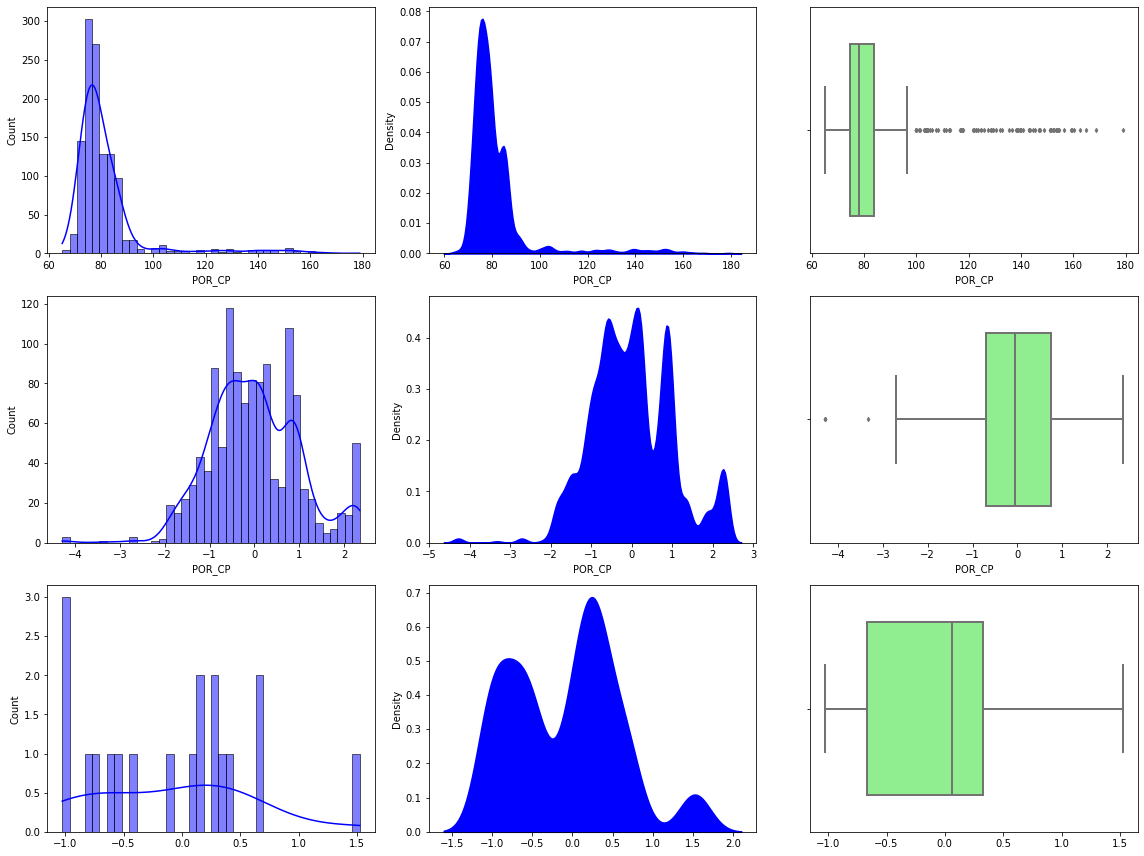

In [164]:
# Estudio Visualización "POR_CP"
# Métricas POR_CP
print("      =======================================================================")
print(f"      =====     MEDIA DE POR_CP (Original):                {data['POR_CP'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE POR_CP (Sin sesgo):                {new_data['POR_CP'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE POR_CP (Estandarizada):           {standarizacion[0].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE POR_CP (Original):              {data['POR_CP'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE POR_CP (Sin sesgo):             {new_data['POR_CP'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE POR_CP (Estandarizada):          -------     =====")
print(f"      =====     SESGO DE POR_CP (Original):                 {data['POR_CP'].skew():,.5f}     =====")
print(f"      =====     SESGO DE POR_CP (Sin sesgo):                {new_data['POR_CP'].skew():,.5f}     =====")
print(f"      =====     SESGO DE POR_CP (Estandarizada):            -------     =====")
print(f"      =====     VARIANZA DE POR_CP (Original):             {data['POR_CP'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE POR_CP (Sin sesgo):             {new_data['POR_CP'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE POR_CP (Estandarizada):         {standarizacion[0].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['POR_CP'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['POR_CP'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de POR_CP
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["POR_CP"],         ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["POR_CP"],          ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["POR_CP"],      ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["POR_CP"],     ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["POR_CP"],      ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["POR_CP"],  ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[0],      ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[0],       ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[0],           ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="DISTANCIA"></a>
# <font color="#004D7F">Nueva Visualización DISTANCIA</font>

      =====     MEDIA DE DISTANCIA (Original):          1,517.45321     =====
      =====     MEDIA DE DISTANCIA (Sin sesgo):             0.00000     =====
      =====     MEDIA DE DISTANCIA (Estandarizada):        -0.04340     =====
      =====     MEDIANA DE DISTANCIA (Original):        1,000.00000     =====
      =====     MEDIANA DE DISTANCIA (Sin sesgo):          -0.21175     =====
      =====     MEDIANA DE DISTANCIA (Estandarizada):       -------     =====
      =====     SESGO DE DISTANCIA (Original):              2.52806     =====
      =====     SESGO DE DISTANCIA (Sin sesgo):             0.04057     =====
      =====     SESGO DE DISTANCIA (Estandarizada):         -------     =====
      =====     VARIANZA DE DISTANCIA (Original):       1,359.90764     =====
      =====     VARIANZA DE DISTANCIA (Sin sesgo):          1.00041     =====
      =====     VARIANZA DE DISTANCIA (Estandarizada):      0.42902     =====
      =====     KOURTOSIS (Original):                       6.77

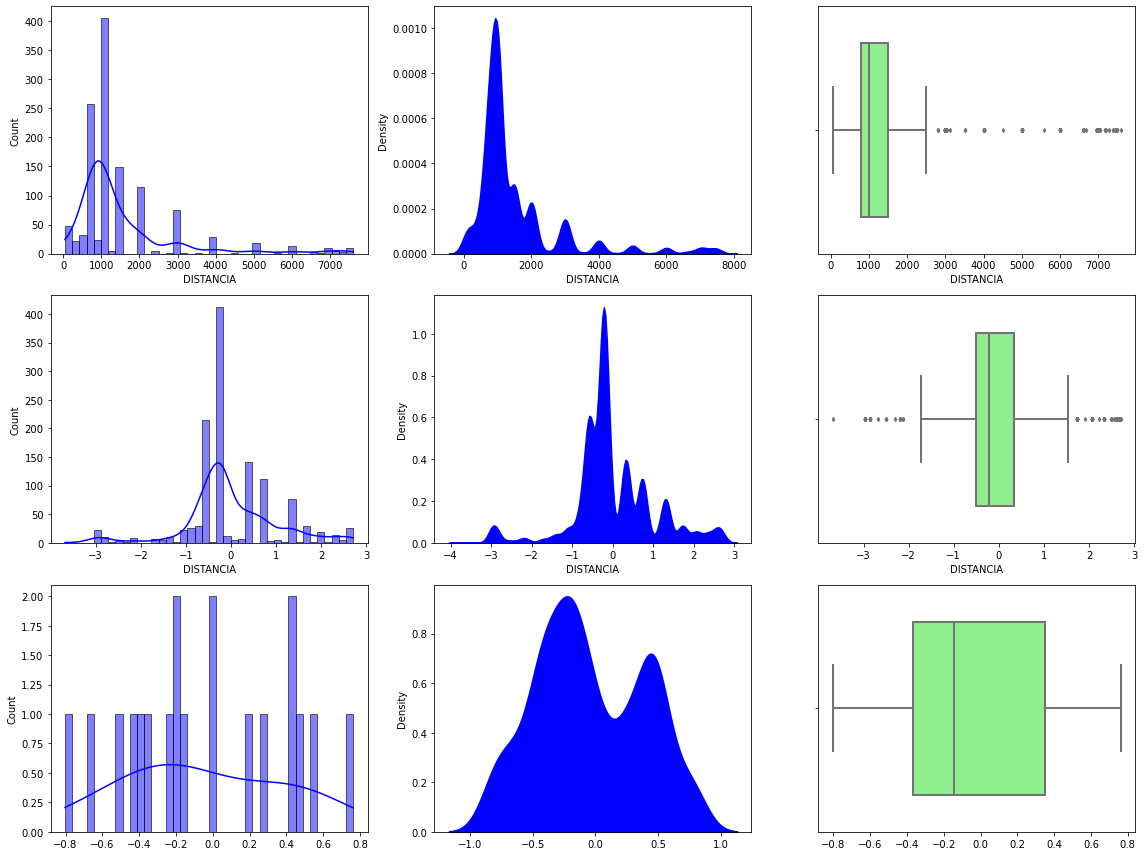

In [89]:
# Estudio Visualización "DISTANCIA"
# Métricas DISTANCIA
print("      =======================================================================")
print(f"      =====     MEDIA DE DISTANCIA (Original):          {data['DISTANCIA'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE DISTANCIA (Sin sesgo):             {new_data['DISTANCIA'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE DISTANCIA (Estandarizada):        {standarizacion[1].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE DISTANCIA (Original):        {data['DISTANCIA'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE DISTANCIA (Sin sesgo):          {new_data['DISTANCIA'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE DISTANCIA (Estandarizada):       -------     =====")
print(f"      =====     SESGO DE DISTANCIA (Original):              {data['DISTANCIA'].skew():,.5f}     =====")
print(f"      =====     SESGO DE DISTANCIA (Sin sesgo):             {new_data['DISTANCIA'].skew():,.5f}     =====")
print(f"      =====     SESGO DE DISTANCIA (Estandarizada):         -------     =====")
print(f"      =====     VARIANZA DE DISTANCIA (Original):       {data['DISTANCIA'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE DISTANCIA (Sin sesgo):          {new_data['DISTANCIA'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE DISTANCIA (Estandarizada):      {standarizacion[1].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                       {data['DISTANCIA'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['DISTANCIA'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de DISTANCIA
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["DISTANCIA"],         ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["DISTANCIA"],          ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["DISTANCIA"],      ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["DISTANCIA"],     ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["DISTANCIA"],      ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["DISTANCIA"],  ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[1],      ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[1],       ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[1],           ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="RITMO"></a>
# <font color="#004D7F">Nueva Visualización RITMO</font>

      =====     MEDIA DE RITMO (Original):                501.77705     =====
      =====     MEDIA DE RITMO (Sin sesgo):                -0.00000     =====
      =====     MEDIA DE RITMO (Estandarizada):            -0.02922     =====
      =====     MEDIANA DE RITMO (Original):              513.00000     =====
      =====     MEDIANA DE RITMO (Sin sesgo):               0.00295     =====
      =====     MEDIANA DE RITMO (Estandarizada):           -------     =====
      =====     SESGO DE RITMO (Original):                 -2.61498     =====
      =====     SESGO DE RITMO (Sin sesgo):                -0.07580     =====
      =====     SESGO DE RITMO (Estandarizada):             -------     =====
      =====     VARIANZA DE RITMO (Original):              59.27862     =====
      =====     VARIANZA DE RITMO (Sin sesgo):              1.00041     =====
      =====     VARIANZA DE RITMO (Estandarizada):          0.39514     =====
      =====     KOURTOSIS (Original):                       8.43

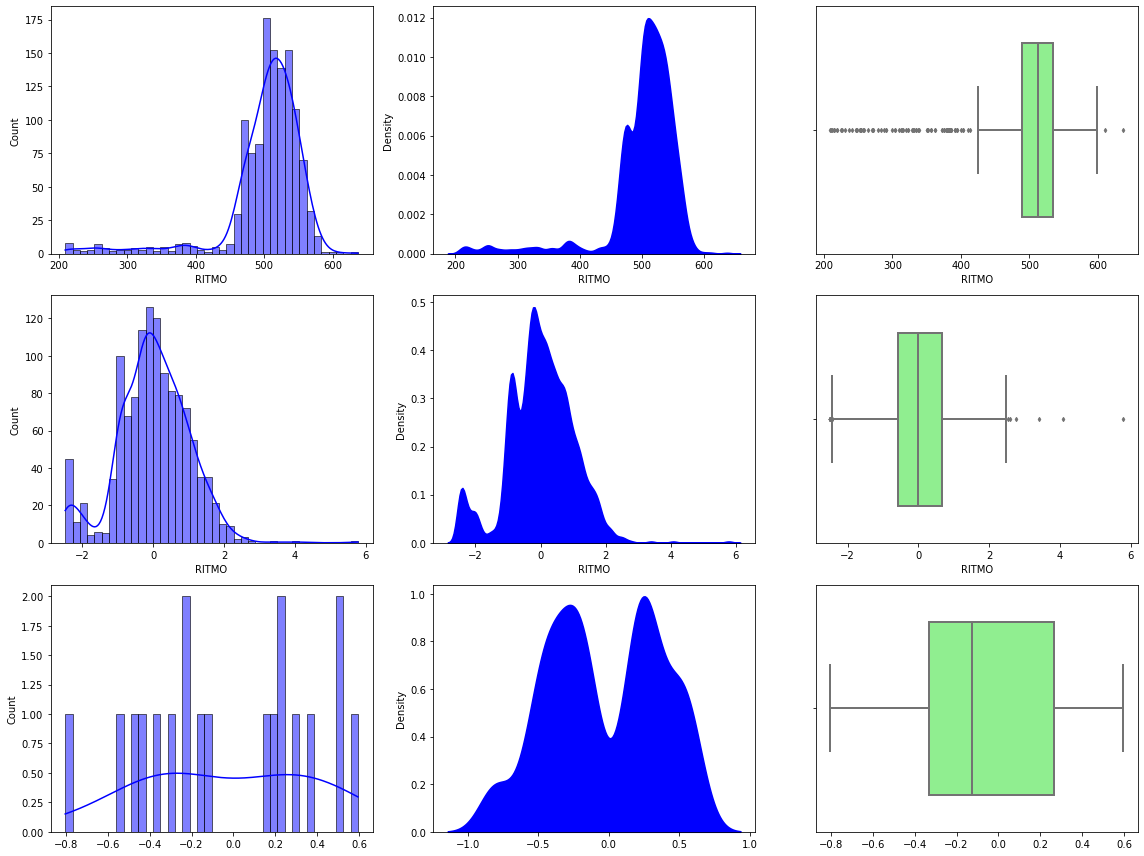

In [90]:
# Estudio Visualización "RITMO"
# Métricas RITMO
print("      =======================================================================")
print(f"      =====     MEDIA DE RITMO (Original):                {data['RITMO'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RITMO (Sin sesgo):                {new_data['RITMO'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RITMO (Estandarizada):            {standarizacion[2].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE RITMO (Original):              {data['RITMO'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RITMO (Sin sesgo):               {new_data['RITMO'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RITMO (Estandarizada):           -------     =====")
print(f"      =====     SESGO DE RITMO (Original):                 {data['RITMO'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RITMO (Sin sesgo):                {new_data['RITMO'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RITMO (Estandarizada):             -------     =====")
print(f"      =====     VARIANZA DE RITMO (Original):              {data['RITMO'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RITMO (Sin sesgo):              {new_data['RITMO'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RITMO (Estandarizada):          {standarizacion[2].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                       {data['RITMO'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['RITMO'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de RITMO
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["RITMO"],         ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["RITMO"],          ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["RITMO"],      ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["RITMO"],     ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["RITMO"],      ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["RITMO"],  ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[2],      ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[2],       ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[2],           ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="FREC_CARDIACA"></a>
# <font color="#004D7F">Nueva Visualización FREC_CARDIACA</font>

      =====     MEDIA DE FREC_CARDIACA (Original):        134.55004     =====
      =====     MEDIA DE FREC_CARDIACA (Sin sesgo):       134.55004     =====
      =====     MEDIA DE FREC_CARDIACA (Estandarizada):    -0.02392     =====
      =====     MEDIANA DE FREC_CARDIACA (Original):      135.00000     =====
      =====     MEDIANA DE FREC_CARDIACA (Sin sesgo):     135.00000     =====
      =====     MEDIANA DE FREC_CARDIACA (Estandarizada):   -------     =====
      =====     SESGO DE FREC_CARDIACA (Original):          0.12813     =====
      =====     SESGO DE FREC_CARDIACA (Sin sesgo):         0.12813     =====
      =====     SESGO DE FREC_CARDIACA (Estandarizada):     -------     =====
      =====     VARIANZA DE FREC_CARDIACA (Original):      12.76326     =====
      =====     VARIANZA DE FREC_CARDIACA (Sin sesgo):     12.76326     =====
      =====     VARIANZA DE FREC_CARDIACA (Estandarizada):  0.32106     =====
      =====     KOURTOSIS (Original):                      -0.71

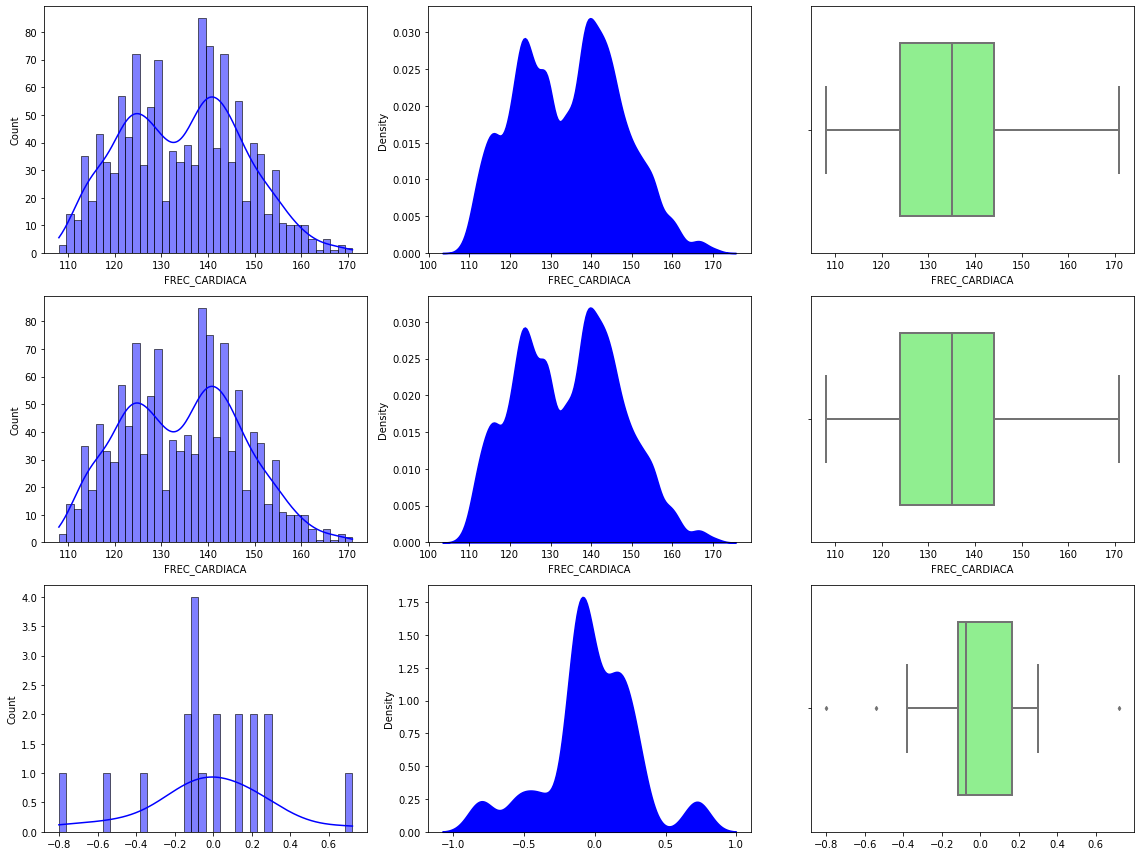

In [156]:
# Estudio Visualización "FREC_CARDIACA"
# Métricas FREC_CARDIACA
print("      =======================================================================")
print(f"      =====     MEDIA DE FREC_CARDIACA (Original):        {data['FREC_CARDIACA'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE FREC_CARDIACA (Sin sesgo):       {new_data['FREC_CARDIACA'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE FREC_CARDIACA (Estandarizada):    {standarizacion[17].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE FREC_CARDIACA (Original):      {data['FREC_CARDIACA'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE FREC_CARDIACA (Sin sesgo):     {new_data['FREC_CARDIACA'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE FREC_CARDIACA (Estandarizada):   -------     =====")
print(f"      =====     SESGO DE FREC_CARDIACA (Original):          {data['FREC_CARDIACA'].skew():,.5f}     =====")
print(f"      =====     SESGO DE FREC_CARDIACA (Sin sesgo):         {new_data['FREC_CARDIACA'].skew():,.5f}     =====")
print(f"      =====     SESGO DE FREC_CARDIACA (Estandarizada):     -------     =====")
print(f"      =====     VARIANZA DE FREC_CARDIACA (Original):      {data['FREC_CARDIACA'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE FREC_CARDIACA (Sin sesgo):     {new_data['FREC_CARDIACA'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE FREC_CARDIACA (Estandarizada):  {standarizacion[17].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['FREC_CARDIACA'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                     {new_data['FREC_CARDIACA'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de FREC_CARDIACA
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["FREC_CARDIACA"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["FREC_CARDIACA"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["FREC_CARDIACA"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["FREC_CARDIACA"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["FREC_CARDIACA"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["FREC_CARDIACA"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[17],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[17],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[17], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="CADENCIA"></a>
# <font color="#004D7F">Nueva Visualización CADENCIA</font>

      =====     MEDIA DE CADENCIA (Original):             162.51017     =====
      =====     MEDIA DE CADENCIA (Sin sesgo):            162.51017     =====
      =====     MEDIA DE CADENCIA (Estandarizada):          0.00011     =====
      =====     MEDIANA DE CADENCIA (Original):           162.00000     =====
      =====     MEDIANA DE CADENCIA (Sin sesgo):          162.00000     =====
      =====     MEDIANA DE CADENCIA (Estandarizada):        -------     =====
      =====     SESGO DE CADENCIA (Original):              -0.66854     =====
      =====     SESGO DE CADENCIA (Sin sesgo):             -0.66854     =====
      =====     SESGO DE CADENCIA (Estandarizada):          -------     =====
      =====     VARIANZA DE CADENCIA (Original):            5.27834     =====
      =====     VARIANZA DE CADENCIA (Sin sesgo):           5.27834     =====
      =====     VARIANZA DE CADENCIA (Estandarizada):       0.79117     =====
      =====     KOURTOSIS (Original):                      12.09

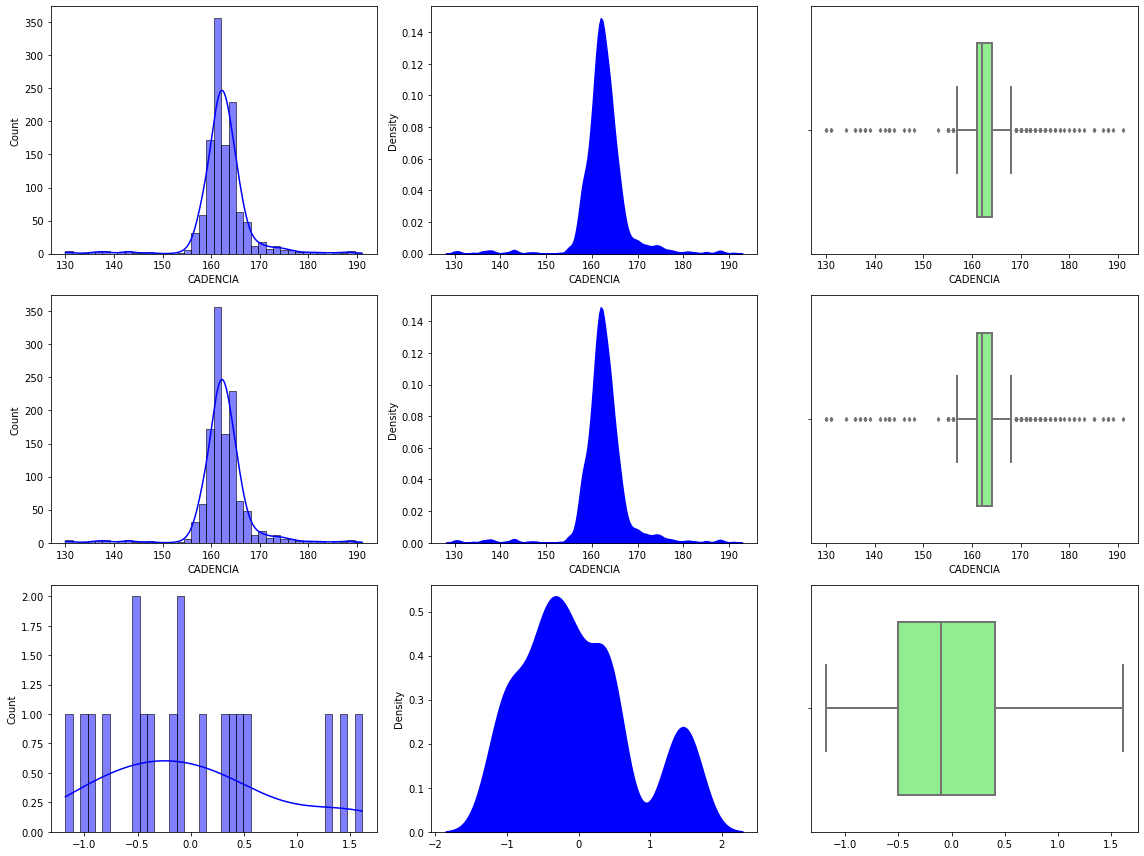

In [160]:
# Estudio Visualización "CADENCIA"
# Métricas CADENCIA
print("      =======================================================================")
print(f"      =====     MEDIA DE CADENCIA (Original):             {data['CADENCIA'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE CADENCIA (Sin sesgo):            {new_data['CADENCIA'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE CADENCIA (Estandarizada):          {standarizacion[18].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE CADENCIA (Original):           {data['CADENCIA'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE CADENCIA (Sin sesgo):          {new_data['CADENCIA'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE CADENCIA (Estandarizada):        -------     =====")
print(f"      =====     SESGO DE CADENCIA (Original):              {data['CADENCIA'].skew():,.5f}     =====")
print(f"      =====     SESGO DE CADENCIA (Sin sesgo):             {new_data['CADENCIA'].skew():,.5f}     =====")
print(f"      =====     SESGO DE CADENCIA (Estandarizada):          -------     =====")
print(f"      =====     VARIANZA DE CADENCIA (Original):            {data['CADENCIA'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE CADENCIA (Sin sesgo):           {new_data['CADENCIA'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE CADENCIA (Estandarizada):       {standarizacion[18].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['CADENCIA'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                     {new_data['CADENCIA'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de CADENCIA
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["CADENCIA"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["CADENCIA"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["CADENCIA"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["CADENCIA"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["CADENCIA"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["CADENCIA"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[18],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[18],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[18], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="TSC"></a>
# <font color="#004D7F">Nueva Visualización TSC</font>

      =====     MEDIA DE TSC (Original):                  325.17901     =====
      =====     MEDIA DE TSC (Sin sesgo):                  -0.00000     =====
      =====     MEDIA DE TSC (Estandarizada):               0.03531     =====
      =====     MEDIANA DE TSC (Original):                336.00000     =====
      =====     MEDIANA DE TSC (Sin sesgo):                 0.15616     =====
      =====     MEDIANA DE TSC (Estandarizada):             -------     =====
      =====     SESGO DE TSC (Original):                   -3.94731     =====
      =====     SESGO DE TSC (Sin sesgo):                  -0.92417     =====
      =====     SESGO DE TSC (Estandarizada):               -------     =====
      =====     VARIANZA DE TSC (Original):                41.20724     =====
      =====     VARIANZA DE TSC (Sin sesgo):                1.00041     =====
      =====     VARIANZA DE TSC (Estandarizada):            0.41512     =====
      =====     KOURTOSIS (Original):                      16.52

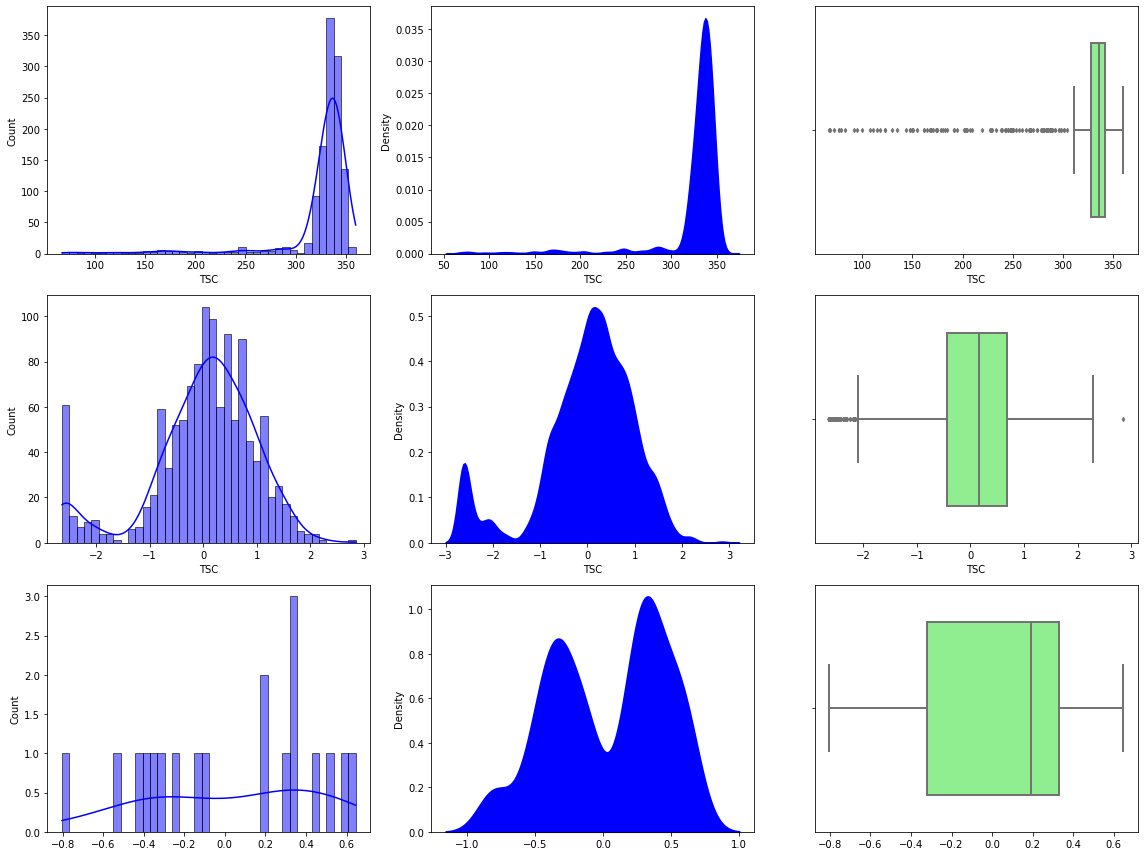

In [91]:
# Estudio Visualización "TSC"
# Métricas TSC
print("      =======================================================================")
print(f"      =====     MEDIA DE TSC (Original):                  {data['TSC'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE TSC (Sin sesgo):                  {new_data['TSC'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE TSC (Estandarizada):               {standarizacion[3].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE TSC (Original):                {data['TSC'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE TSC (Sin sesgo):                 {new_data['TSC'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE TSC (Estandarizada):             -------     =====")
print(f"      =====     SESGO DE TSC (Original):                   {data['TSC'].skew():,.5f}     =====")
print(f"      =====     SESGO DE TSC (Sin sesgo):                  {new_data['TSC'].skew():,.5f}     =====")
print(f"      =====     SESGO DE TSC (Estandarizada):               -------     =====")
print(f"      =====     VARIANZA DE TSC (Original):                {data['TSC'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE TSC (Sin sesgo):                {new_data['TSC'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE TSC (Estandarizada):            {standarizacion[3].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['TSC'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['TSC'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de TSC
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["TSC"],         ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["TSC"],          ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["TSC"],      ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["TSC"],     ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["TSC"],      ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["TSC"],  ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[3],      ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[3],       ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[3],           ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="FP"></a>
# <font color="#004D7F">Nueva Visualización FP</font>

      =====     MEDIA DE FP (Original):                    67.50529     =====
      =====     MEDIA DE FP (Sin sesgo):                    0.00000     =====
      =====     MEDIA DE FP (Estandarizada):               -0.02095     =====
      =====     MEDIANA DE FP (Original):                  68.00000     =====
      =====     MEDIANA DE FP (Sin sesgo):                  0.08538     =====
      =====     MEDIANA DE FP (Estandarizada):              -------     =====
      =====     SESGO DE FP (Original):                    -3.10833     =====
      =====     SESGO DE FP (Sin sesgo):                    0.89399     =====
      =====     SESGO DE FP (Estandarizada):                -------     =====
      =====     VARIANZA DE FP (Original):                  3.47223     =====
      =====     VARIANZA DE FP (Sin sesgo):                 1.00041     =====
      =====     VARIANZA DE FP (Estandarizada):             0.46022     =====
      =====     KOURTOSIS (Original):                      25.32

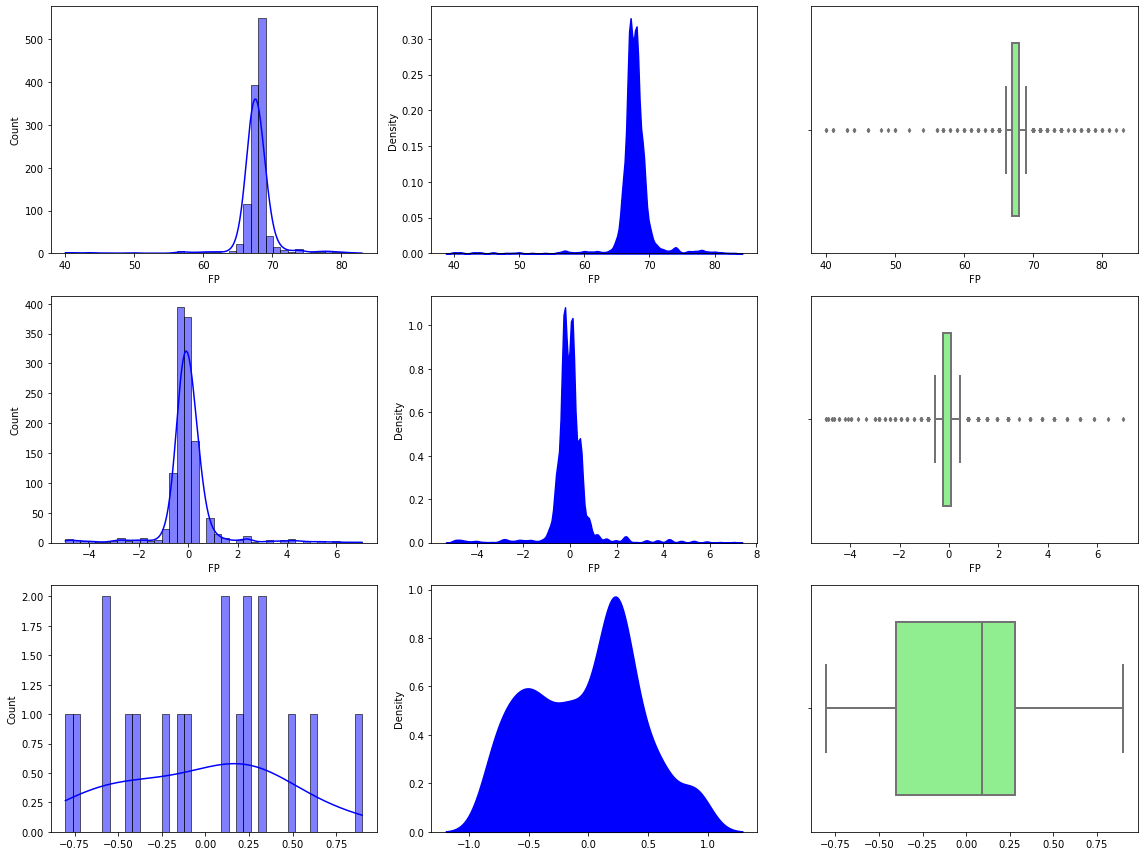

In [92]:
# Estudio Visualización "FP"
# Métricas FP
print("      =======================================================================")
print(f"      =====     MEDIA DE FP (Original):                    {data['FP'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE FP (Sin sesgo):                    {new_data['FP'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE FP (Estandarizada):               {standarizacion[4].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE FP (Original):                  {data['FP'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE FP (Sin sesgo):                  {new_data['FP'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE FP (Estandarizada):              -------     =====")
print(f"      =====     SESGO DE FP (Original):                    {data['FP'].skew():,.5f}     =====")
print(f"      =====     SESGO DE FP (Sin sesgo):                    {new_data['FP'].skew():,.5f}     =====")
print(f"      =====     SESGO DE FP (Estandarizada):                -------     =====")
print(f"      =====     VARIANZA DE FP (Original):                  {data['FP'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE FP (Sin sesgo):                 {new_data['FP'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE FP (Estandarizada):             {standarizacion[4].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['FP'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                     {new_data['FP'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de FP
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["FP"],         ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["FP"],          ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["FP"],      ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["FP"],     ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["FP"],      ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["FP"],  ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[4],      ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[4],       ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[4],           ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="LSS"></a>
# <font color="#004D7F">Nueva Visualización LSS</font>

      =====     MEDIA DE LSS (Original):                   11.81676     =====
      =====     MEDIA DE LSS (Sin sesgo):                  -0.00000     =====
      =====     MEDIA DE LSS (Estandarizada):               0.04053     =====
      =====     MEDIANA DE LSS (Original):                 12.00000     =====
      =====     MEDIANA DE LSS (Sin sesgo):                -0.02832     =====
      =====     MEDIANA DE LSS (Estandarizada):             -------     =====
      =====     SESGO DE LSS (Original):                   -5.28746     =====
      =====     SESGO DE LSS (Sin sesgo):                  -0.32477     =====
      =====     SESGO DE LSS (Estandarizada):               -------     =====
      =====     VARIANZA DE LSS (Original):                 1.18628     =====
      =====     VARIANZA DE LSS (Sin sesgo):                1.00041     =====
      =====     VARIANZA DE LSS (Estandarizada):            0.51831     =====
      =====     KOURTOSIS (Original):                      32.42

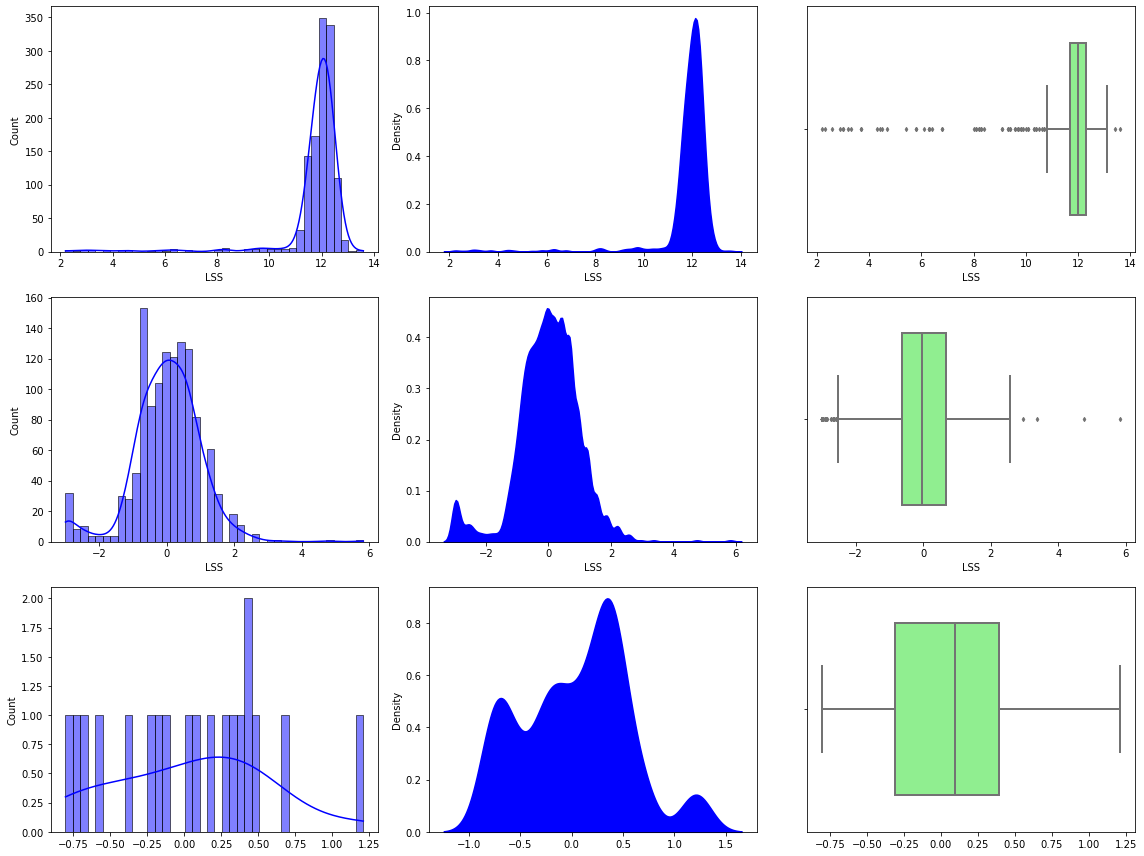

In [93]:
# Estudio Visualización "LSS"
# Métricas LSS
print("      =======================================================================")
print(f"      =====     MEDIA DE LSS (Original):                   {data['LSS'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE LSS (Sin sesgo):                  {new_data['LSS'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE LSS (Estandarizada):               {standarizacion[5].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE LSS (Original):                 {data['LSS'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE LSS (Sin sesgo):                {new_data['LSS'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE LSS (Estandarizada):             -------     =====")
print(f"      =====     SESGO DE LSS (Original):                   {data['LSS'].skew():,.5f}     =====")
print(f"      =====     SESGO DE LSS (Sin sesgo):                  {new_data['LSS'].skew():,.5f}     =====")
print(f"      =====     SESGO DE LSS (Estandarizada):               -------     =====")
print(f"      =====     VARIANZA DE LSS (Original):                 {data['LSS'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE LSS (Sin sesgo):                {new_data['LSS'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE LSS (Estandarizada):            {standarizacion[5].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['LSS'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['LSS'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de LSS
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["LSS"],         ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["LSS"],          ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["LSS"],      ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["LSS"],     ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["LSS"],      ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["LSS"],  ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[5],      ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[5],       ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[5],           ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="OSC_VERTICAL"></a>
# <font color="#004D7F">Nueva Visualización OSC_VERTICAL</font>

      =====     MEDIA DE OSC_VERTICAL (Original):           5.59492     =====
      =====     MEDIA DE OSC_VERTICAL (Sin sesgo):          0.00000     =====
      =====     MEDIA DE OSC_VERTICAL (Estandarizada):      0.05797     =====
      =====     MEDIANA DE OSC_VERTICAL (Original):         5.64000     =====
      =====     MEDIANA DE OSC_VERTICAL (Sin sesgo):       -0.01391     =====
      =====     MEDIANA DE OSC_VERTICAL (Estandarizada):    -------     =====
      =====     SESGO DE OSC_VERTICAL (Original):          -4.79063     =====
      =====     SESGO DE OSC_VERTICAL (Sin sesgo):          0.73887     =====
      =====     SESGO DE OSC_VERTICAL (Estandarizada):      -------     =====
      =====     VARIANZA DE OSC_VERTICAL (Original):        0.52152     =====
      =====     VARIANZA DE OSC_VERTICAL (Sin sesgo):       1.00041     =====
      =====     VARIANZA DE OSC_VERTICAL (Estandarizada):   0.57463     =====
      =====     KOURTOSIS (Original):                      36.36

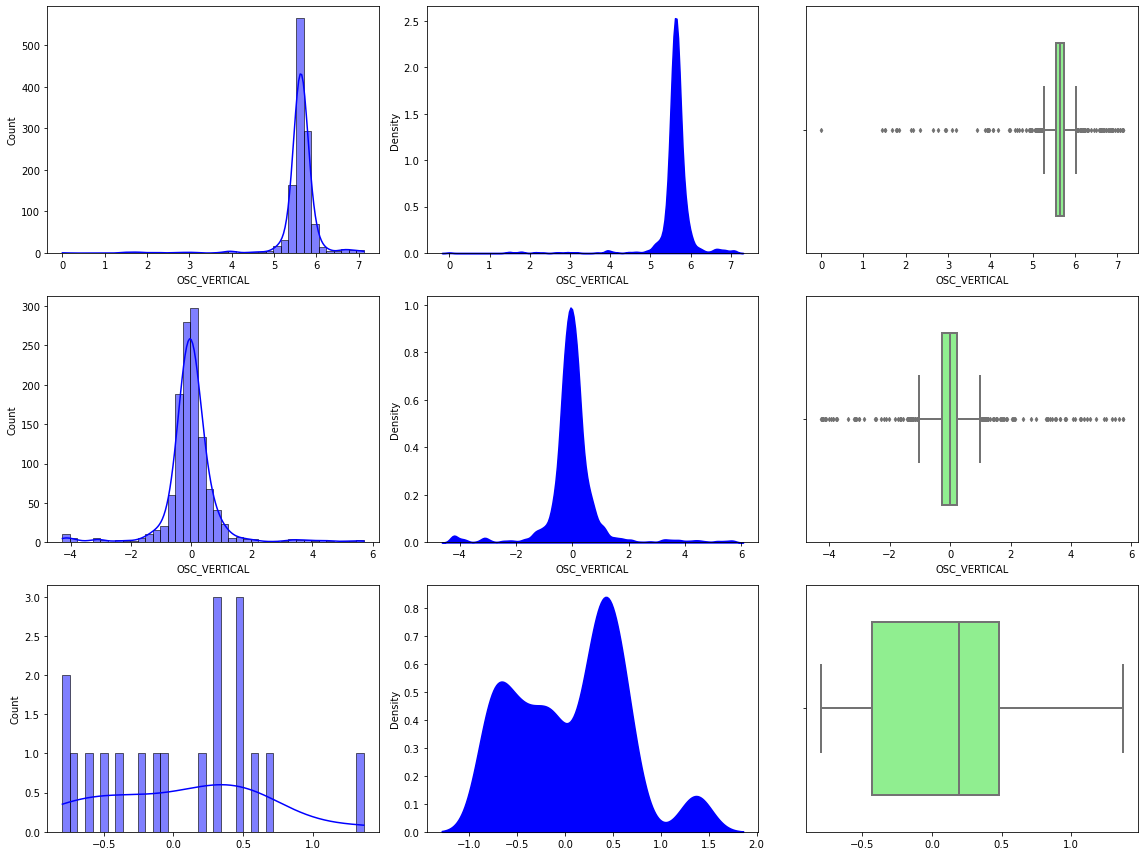

In [94]:
# Estudio Visualización "OSC_VERTICAL"
# Métricas OSC_VERTICAL
print("      =======================================================================")
print(f"      =====     MEDIA DE OSC_VERTICAL (Original):           {data['OSC_VERTICAL'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE OSC_VERTICAL (Sin sesgo):          {new_data['OSC_VERTICAL'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE OSC_VERTICAL (Estandarizada):      {standarizacion[6].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE OSC_VERTICAL (Original):         {data['OSC_VERTICAL'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE OSC_VERTICAL (Sin sesgo):       {new_data['OSC_VERTICAL'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE OSC_VERTICAL (Estandarizada):    -------     =====")
print(f"      =====     SESGO DE OSC_VERTICAL (Original):          {data['OSC_VERTICAL'].skew():,.5f}     =====")
print(f"      =====     SESGO DE OSC_VERTICAL (Sin sesgo):          {new_data['OSC_VERTICAL'].skew():,.5f}     =====")
print(f"      =====     SESGO DE OSC_VERTICAL (Estandarizada):      -------     =====")
print(f"      =====     VARIANZA DE OSC_VERTICAL (Original):        {data['OSC_VERTICAL'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE OSC_VERTICAL (Sin sesgo):       {new_data['OSC_VERTICAL'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE OSC_VERTICAL (Estandarizada):   {standarizacion[6].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['OSC_VERTICAL'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                     {new_data['OSC_VERTICAL'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de OSC_VERTICAL
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["OSC_VERTICAL"],         ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["OSC_VERTICAL"],          ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["OSC_VERTICAL"],      ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["OSC_VERTICAL"],     ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["OSC_VERTICAL"],      ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["OSC_VERTICAL"],  ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[6],      ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[6],       ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[6],           ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="L_ZANCADA"></a>
# <font color="#004D7F">Nueva Visualización L_ZANCADA</font>

      =====     MEDIA DE L_ZANCADA (Original):              0.74927     =====
      =====     MEDIA DE L_ZANCADA (Sin sesgo):            -0.00000     =====
      =====     MEDIA DE L_ZANCADA (Estandarizada):        -0.03329     =====
      =====     MEDIANA DE L_ZANCADA (Original):            0.72100     =====
      =====     MEDIANA DE L_ZANCADA (Sin sesgo):          -0.01408     =====
      =====     MEDIANA DE L_ZANCADA (Estandarizada):       -------     =====
      =====     SESGO DE L_ZANCADA (Original):              4.18905     =====
      =====     SESGO DE L_ZANCADA (Sin sesgo):             0.20762     =====
      =====     SESGO DE L_ZANCADA (Estandarizada):         -------     =====
      =====     VARIANZA DE L_ZANCADA (Original):           0.12113     =====
      =====     VARIANZA DE L_ZANCADA (Sin sesgo):          1.00041     =====
      =====     VARIANZA DE L_ZANCADA (Estandarizada):      0.63519     =====
      =====     KOURTOSIS (Original):                      19.95

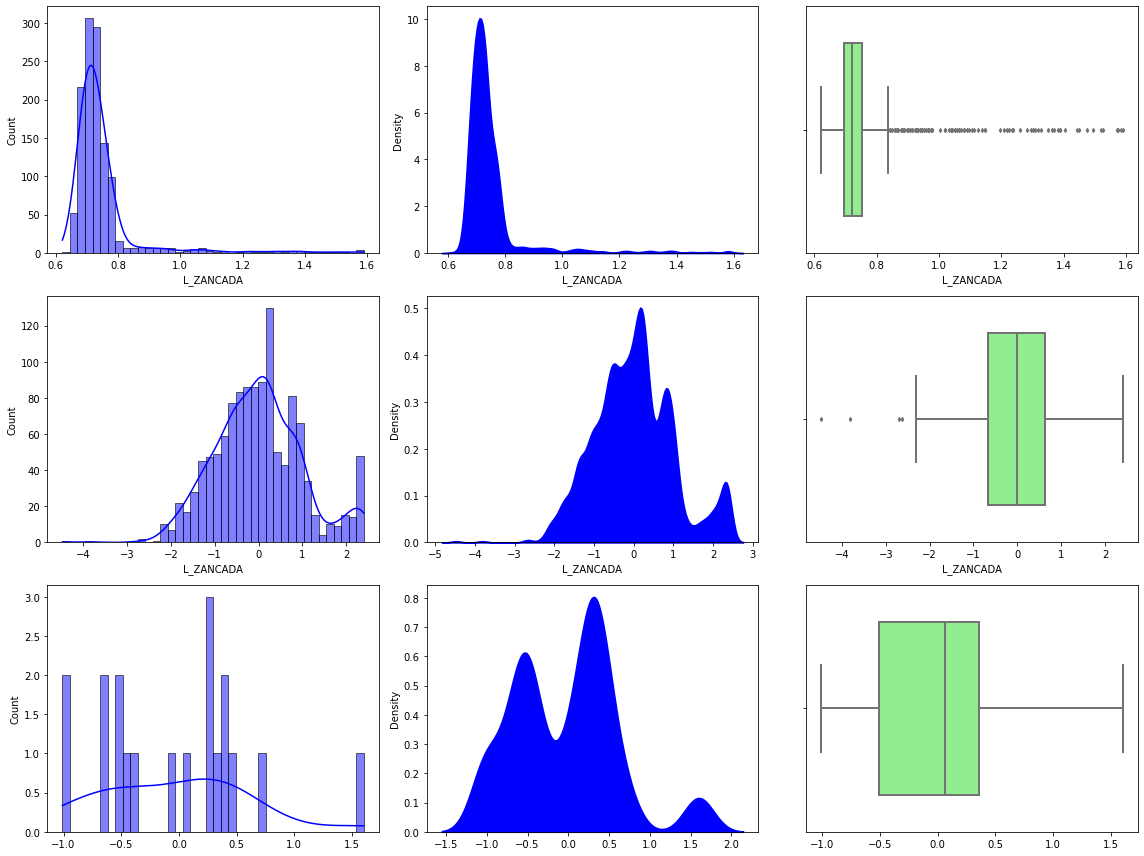

In [95]:
# Estudio Visualización "L_ZANCADA"
# Métricas L_ZANCADA
print("      =======================================================================")
print(f"      =====     MEDIA DE L_ZANCADA (Original):              {data['L_ZANCADA'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE L_ZANCADA (Sin sesgo):            {new_data['L_ZANCADA'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE L_ZANCADA (Estandarizada):        {standarizacion[7].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE L_ZANCADA (Original):            {data['L_ZANCADA'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE L_ZANCADA (Sin sesgo):          {new_data['L_ZANCADA'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE L_ZANCADA (Estandarizada):       -------     =====")
print(f"      =====     SESGO DE L_ZANCADA (Original):              {data['L_ZANCADA'].skew():,.5f}     =====")
print(f"      =====     SESGO DE L_ZANCADA (Sin sesgo):             {new_data['L_ZANCADA'].skew():,.5f}     =====")
print(f"      =====     SESGO DE L_ZANCADA (Estandarizada):         -------     =====")
print(f"      =====     VARIANZA DE L_ZANCADA (Original):           {data['L_ZANCADA'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE L_ZANCADA (Sin sesgo):          {new_data['L_ZANCADA'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE L_ZANCADA (Estandarizada):      {standarizacion[7].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['L_ZANCADA'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['L_ZANCADA'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de L_ZANCADA
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["L_ZANCADA"],         ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["L_ZANCADA"],          ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["L_ZANCADA"],      ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["L_ZANCADA"],     ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["L_ZANCADA"],      ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["L_ZANCADA"],  ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[7],      ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[7],       ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                     bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[7],           ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                     width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="RFP"></a>
# <font color="#004D7F">Nueva Visualización RFP</font>

      =====     MEDIA DE RFP (Original):                   38.74932     =====
      =====     MEDIA DE RFP (Sin sesgo):                  -0.00000     =====
      =====     MEDIA DE RFP (Estandarizada):              -0.04690     =====
      =====     MEDIANA DE RFP (Original):                 39.75900     =====
      =====     MEDIANA DE RFP (Sin sesgo):                 0.05532     =====
      =====     MEDIANA DE RFP (Estandarizada):             -------     =====
      =====     SESGO DE RFP (Original):                   -2.86990     =====
      =====     SESGO DE RFP (Sin sesgo):                  -0.25140     =====
      =====     SESGO DE RFP (Estandarizada):               -------     =====
      =====     VARIANZA DE RFP (Original):                 4.31484     =====
      =====     VARIANZA DE RFP (Sin sesgo):                1.00041     =====
      =====     VARIANZA DE RFP (Estandarizada):            0.59087     =====
      =====     KOURTOSIS (Original):                       9.62

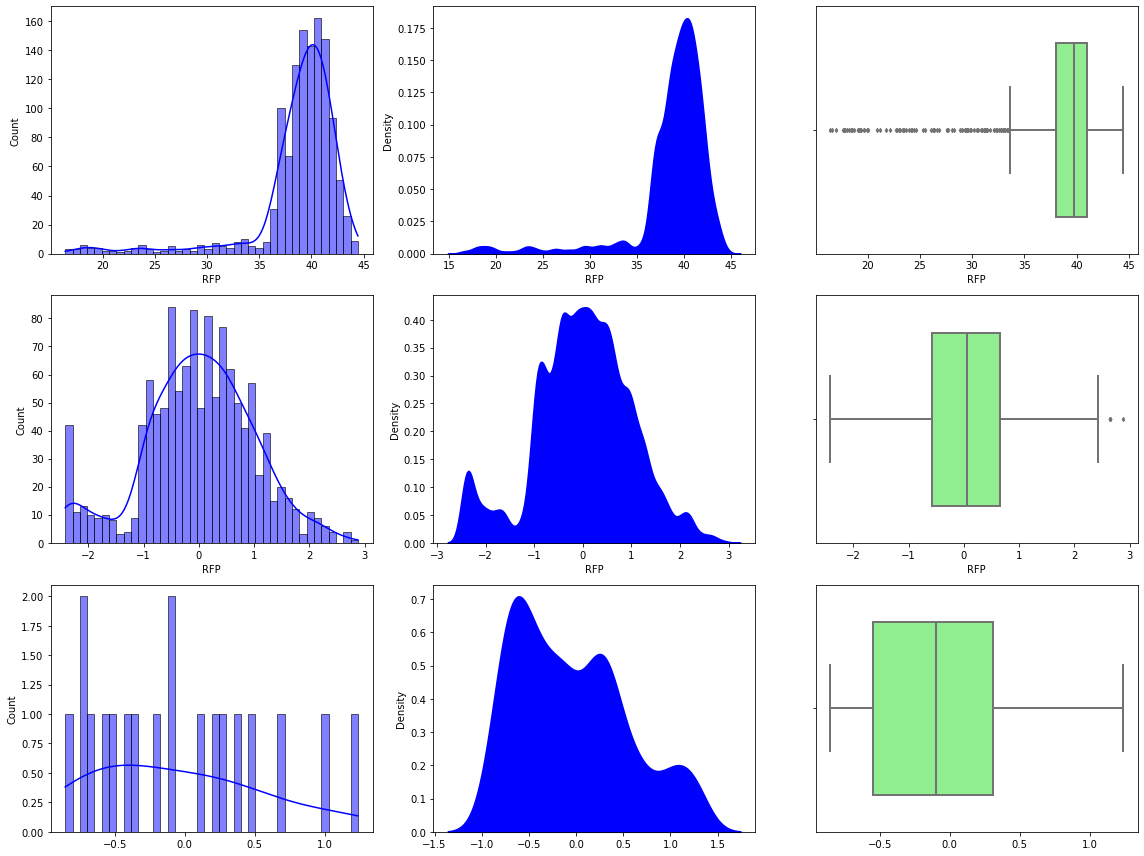

In [109]:
# Estudio Visualización "RFP"
# Métricas RFP
print("      =======================================================================")
print(f"      =====     MEDIA DE RFP (Original):                   {data['RFP'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RFP (Sin sesgo):                  {new_data['RFP'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RFP (Estandarizada):              {standarizacion[8].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE RFP (Original):                 {data['RFP'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RFP (Sin sesgo):                 {new_data['RFP'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RFP (Estandarizada):             -------     =====")
print(f"      =====     SESGO DE RFP (Original):                   {data['RFP'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RFP (Sin sesgo):                  {new_data['RFP'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RFP (Estandarizada):               -------     =====")
print(f"      =====     VARIANZA DE RFP (Original):                 {data['RFP'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RFP (Sin sesgo):                {new_data['RFP'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RFP (Estandarizada):            {standarizacion[8].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                       {data['RFP'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['RFP'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de RFP
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["RFP"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["RFP"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["RFP"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["RFP"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["RFP"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["RFP"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[8],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[8],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[8], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="RLSS"></a>
# <font color="#004D7F">Nueva Visualización RLSS</font>

      =====     MEDIA DE RLSS (Original):                 144.10631     =====
      =====     MEDIA DE RLSS (Sin sesgo):                 -0.00000     =====
      =====     MEDIA DE RLSS (Estandarizada):              0.53271     =====
      =====     MEDIANA DE RLSS (Original):               146.34100     =====
      =====     MEDIANA DE RLSS (Sin sesgo):               -0.02830     =====
      =====     MEDIANA DE RLSS (Estandarizada):            -------     =====
      =====     SESGO DE RLSS (Original):                  -5.28741     =====
      =====     SESGO DE RLSS (Sin sesgo):                 -0.32477     =====
      =====     SESGO DE RLSS (Estandarizada):              -------     =====
      =====     VARIANZA DE RLSS (Original):               14.46686     =====
      =====     VARIANZA DE RLSS (Sin sesgo):               1.00041     =====
      =====     VARIANZA DE RLSS (Estandarizada):           1.11961     =====
      =====     KOURTOSIS (Original):                      32.42

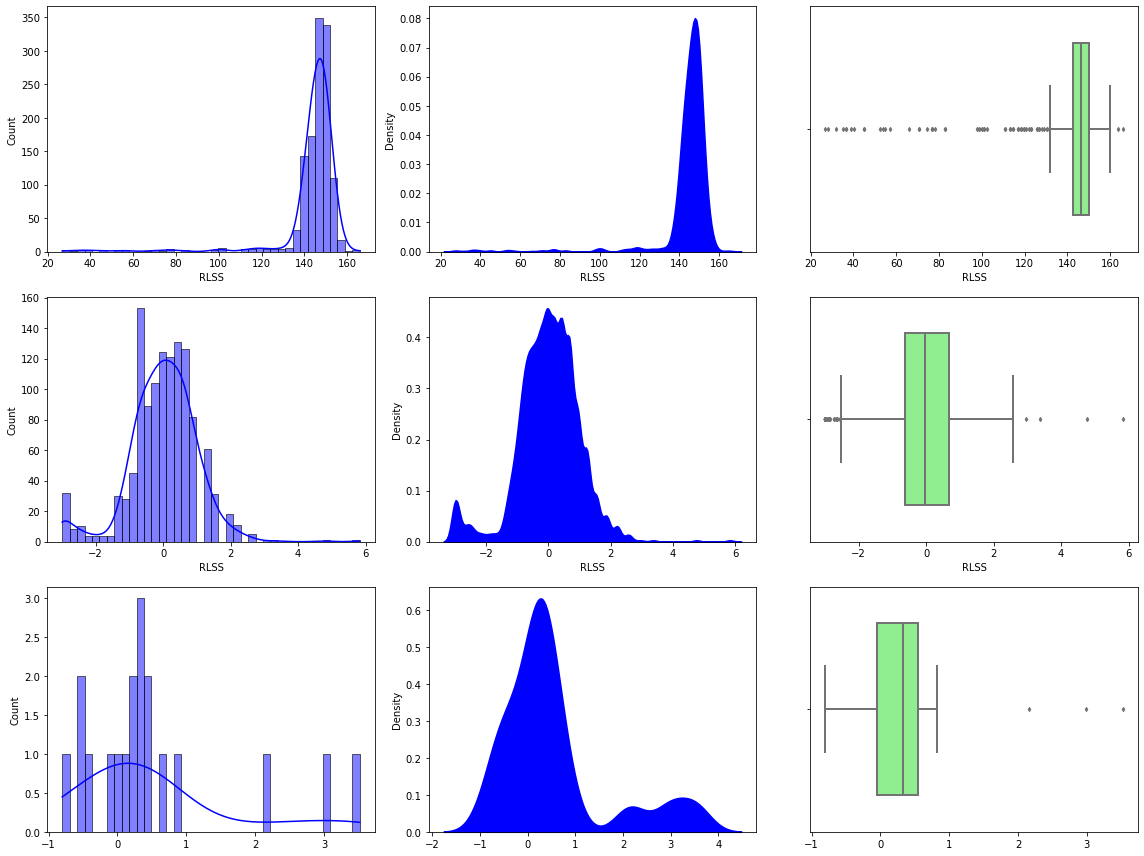

In [113]:
# Estudio Visualización "RLSS"
# Métricas RLSS
print("      =======================================================================")
print(f"      =====     MEDIA DE RLSS (Original):                 {data['RLSS'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RLSS (Sin sesgo):                 {new_data['RLSS'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RLSS (Estandarizada):              {standarizacion[9].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE RLSS (Original):               {data['RLSS'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RLSS (Sin sesgo):               {new_data['RLSS'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RLSS (Estandarizada):            -------     =====")
print(f"      =====     SESGO DE RLSS (Original):                  {data['RLSS'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RLSS (Sin sesgo):                 {new_data['RLSS'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RLSS (Estandarizada):              -------     =====")
print(f"      =====     VARIANZA DE RLSS (Original):               {data['RLSS'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RLSS (Sin sesgo):               {new_data['RLSS'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RLSS (Estandarizada):           {standarizacion[9].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['RLSS'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['RLSS'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de RLSS
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["RLSS"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["RLSS"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["RLSS"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["RLSS"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["RLSS"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["RLSS"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[9],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[9],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[9], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="ROV"></a>
# <font color="#004D7F">Nueva Visualización ROV</font>

      =====     MEDIA DE ROV (Original):                    7.67679     =====
      =====     MEDIA DE ROV (Sin sesgo):                   0.00000     =====
      =====     MEDIA DE ROV (Estandarizada):               0.07464     =====
      =====     MEDIANA DE ROV (Original):                  7.83000     =====
      =====     MEDIANA DE ROV (Sin sesgo):                 0.05313     =====
      =====     MEDIANA DE ROV (Estandarizada):             -------     =====
      =====     SESGO DE ROV (Original):                   -3.45735     =====
      =====     SESGO DE ROV (Sin sesgo):                   0.44346     =====
      =====     SESGO DE ROV (Estandarizada):               -------     =====
      =====     VARIANZA DE ROV (Original):                 0.86069     =====
      =====     VARIANZA DE ROV (Sin sesgo):                1.00041     =====
      =====     VARIANZA DE ROV (Estandarizada):            0.39938     =====
      =====     KOURTOSIS (Original):                      17.38

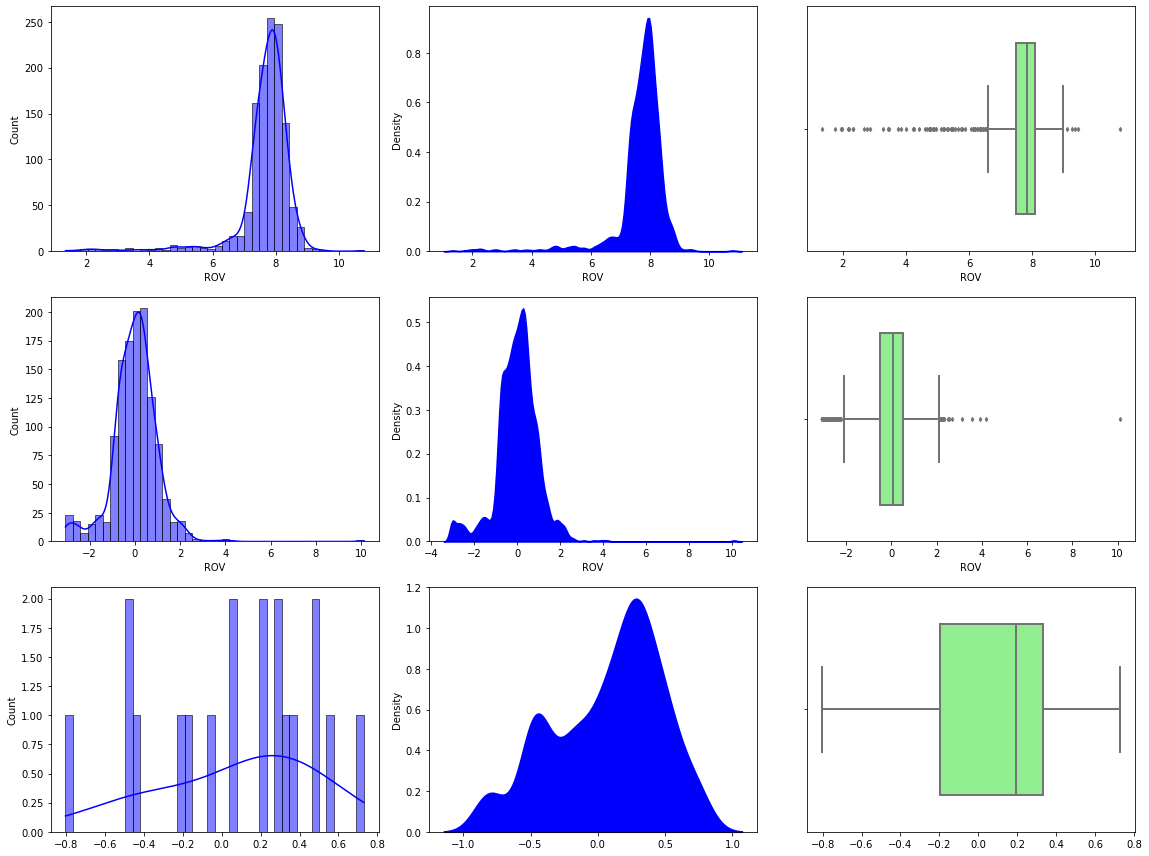

In [116]:
# Estudio Visualización "ROV"
# Métricas ROV
print("      =======================================================================")
print(f"      =====     MEDIA DE ROV (Original):                    {data['ROV'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE ROV (Sin sesgo):                   {new_data['ROV'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE ROV (Estandarizada):               {standarizacion[10].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE ROV (Original):                  {data['ROV'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE ROV (Sin sesgo):                 {new_data['ROV'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE ROV (Estandarizada):             -------     =====")
print(f"      =====     SESGO DE ROV (Original):                   {data['ROV'].skew():,.5f}     =====")
print(f"      =====     SESGO DE ROV (Sin sesgo):                   {new_data['ROV'].skew():,.5f}     =====")
print(f"      =====     SESGO DE ROV (Estandarizada):               -------     =====")
print(f"      =====     VARIANZA DE ROV (Original):                 {data['ROV'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE ROV (Sin sesgo):                {new_data['ROV'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE ROV (Estandarizada):            {standarizacion[10].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['ROV'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['ROV'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de ROV
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["ROV"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["ROV"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["ROV"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["ROV"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["ROV"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["ROV"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[10],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[10],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[10], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="RE"></a>
# <font color="#004D7F">Nueva Visualización RE</font>

      =====     MEDIA DE RE (Original):                     0.85682     =====
      =====     MEDIA DE RE (Sin sesgo):                    0.00000     =====
      =====     MEDIA DE RE (Estandarizada):                0.13600     =====
      =====     MEDIANA DE RE (Original):                   0.93800     =====
      =====     MEDIANA DE RE (Sin sesgo):                  0.25069     =====
      =====     MEDIANA DE RE (Estandarizada):              -------     =====
      =====     SESGO DE RE (Original):                    -2.58906     =====
      =====     SESGO DE RE (Sin sesgo):                   -1.63444     =====
      =====     SESGO DE RE (Estandarizada):                -------     =====
      =====     VARIANZA DE RE (Original):                  0.25616     =====
      =====     VARIANZA DE RE (Sin sesgo):                 1.00041     =====
      =====     VARIANZA DE RE (Estandarizada):             0.41970     =====
      =====     KOURTOSIS (Original):                       4.93

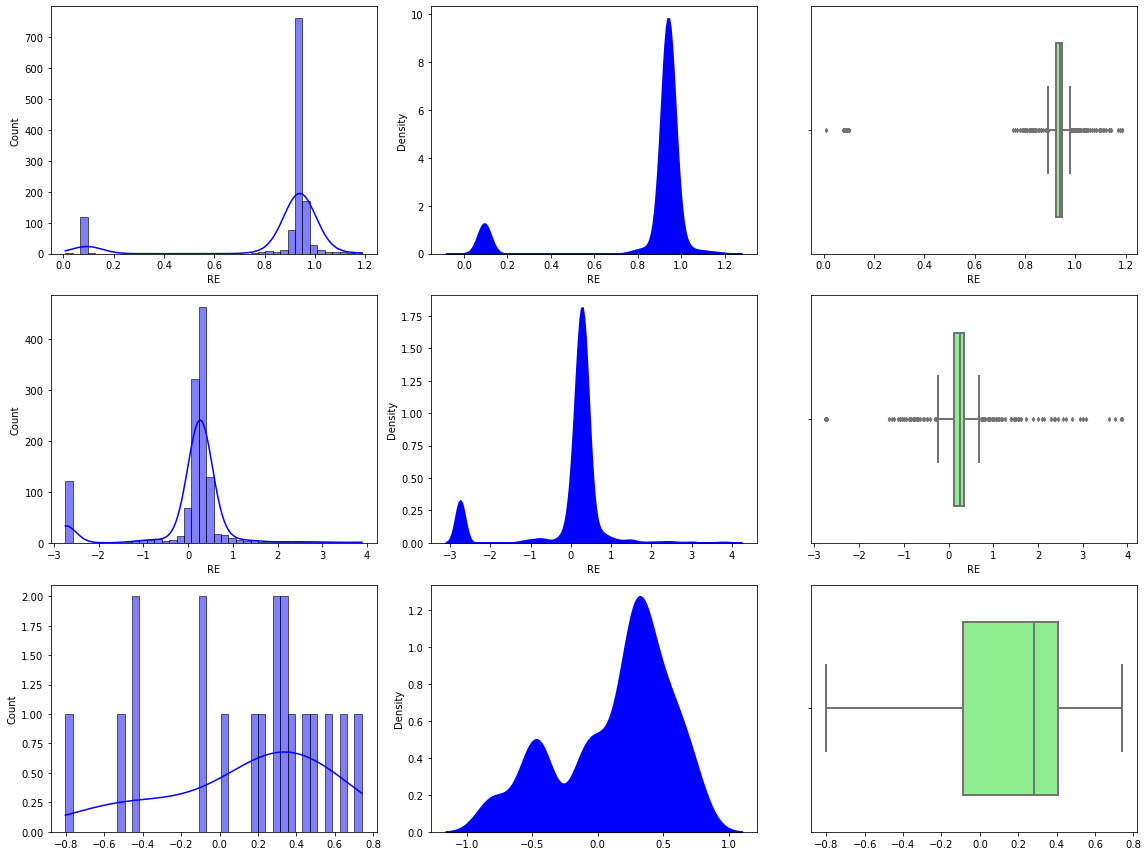

In [119]:
# Estudio Visualización "RE"
# Métricas RE
print("      =======================================================================")
print(f"      =====     MEDIA DE RE (Original):                     {data['RE'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RE (Sin sesgo):                    {new_data['RE'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RE (Estandarizada):                {standarizacion[11].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE RE (Original):                   {data['RE'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RE (Sin sesgo):                  {new_data['RE'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RE (Estandarizada):              -------     =====")
print(f"      =====     SESGO DE RE (Original):                    {data['RE'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RE (Sin sesgo):                   {new_data['RE'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RE (Estandarizada):                -------     =====")
print(f"      =====     VARIANZA DE RE (Original):                  {data['RE'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RE (Sin sesgo):                 {new_data['RE'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RE (Estandarizada):             {standarizacion[11].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                       {data['RE'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['RE'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de RE
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["RE"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["RE"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["RE"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["RE"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["RE"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["RE"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[11],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[11],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[11], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="AIRE"></a>
# <font color="#004D7F">Nueva Visualización AIRE</font>

      =====     MEDIA DE AIRE (Original):                   0.53784     =====
      =====     MEDIA DE AIRE (Sin sesgo):                  0.00000     =====
      =====     MEDIA DE AIRE (Estandarizada):              0.21157     =====
      =====     MEDIANA DE AIRE (Original):                 0.00000     =====
      =====     MEDIANA DE AIRE (Sin sesgo):               -0.90064     =====
      =====     MEDIANA DE AIRE (Estandarizada):            -------     =====
      =====     SESGO DE AIRE (Original):                   1.36583     =====
      =====     SESGO DE AIRE (Sin sesgo):                  0.26974     =====
      =====     SESGO DE AIRE (Estandarizada):              -------     =====
      =====     VARIANZA DE AIRE (Original):                0.67015     =====
      =====     VARIANZA DE AIRE (Sin sesgo):               1.00041     =====
      =====     VARIANZA DE AIRE (Estandarizada):           0.61946     =====
      =====     KOURTOSIS (Original):                       4.04

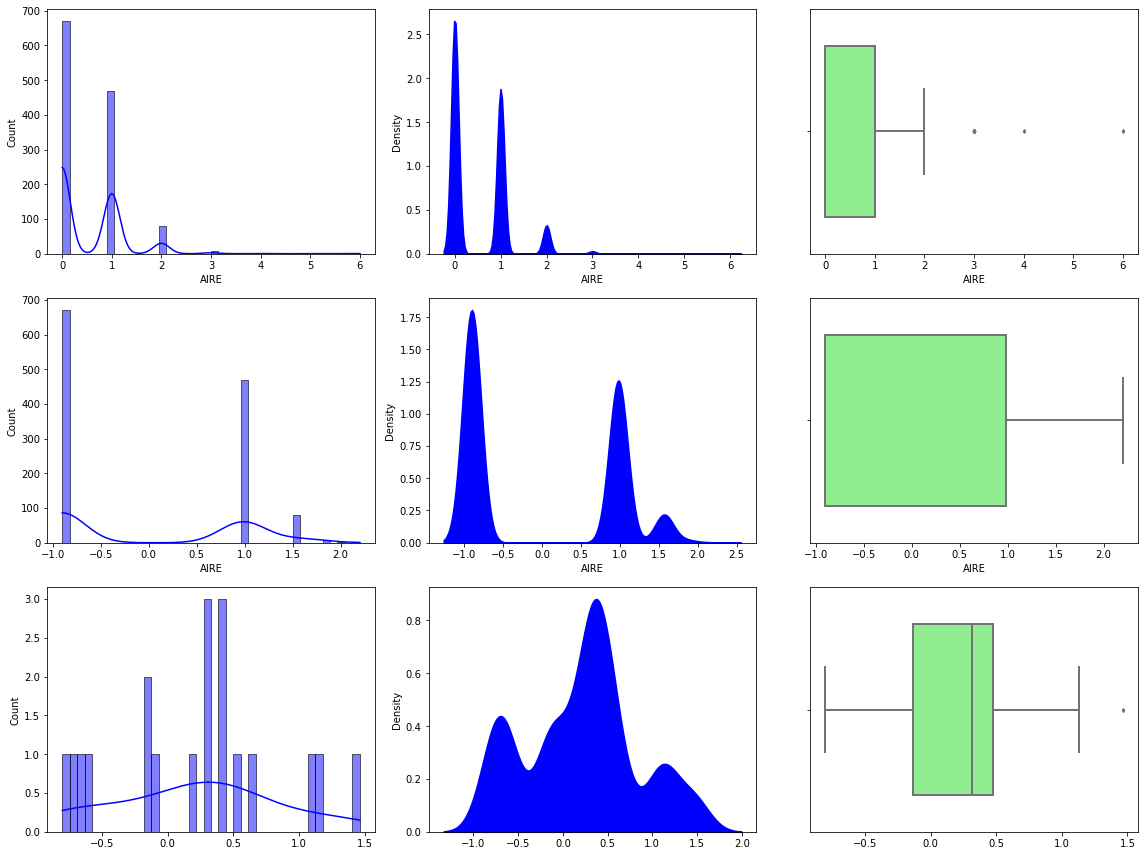

In [136]:
# Estudio Visualización "AIRE"
# Métricas AIRE
print("      =======================================================================")
print(f"      =====     MEDIA DE AIRE (Original):                   {data['AIRE'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE AIRE (Sin sesgo):                  {new_data['AIRE'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE AIRE (Estandarizada):              {standarizacion[14].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE AIRE (Original):                 {data['AIRE'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE AIRE (Sin sesgo):               {new_data['AIRE'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE AIRE (Estandarizada):            -------     =====")
print(f"      =====     SESGO DE AIRE (Original):                   {data['AIRE'].skew():,.5f}     =====")
print(f"      =====     SESGO DE AIRE (Sin sesgo):                  {new_data['AIRE'].skew():,.5f}     =====")
print(f"      =====     SESGO DE AIRE (Estandarizada):              -------     =====")
print(f"      =====     VARIANZA DE AIRE (Original):                {data['AIRE'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE AIRE (Sin sesgo):               {new_data['AIRE'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE AIRE (Estandarizada):           {standarizacion[14].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                       {data['AIRE'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                     {new_data['AIRE'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de AIRE
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["AIRE"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["AIRE"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["AIRE"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["AIRE"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["AIRE"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["AIRE"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[14],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[14],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[14], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="PENDIENTE"></a>
# <font color="#004D7F">Nueva Visualización PENDIENTE</font>

      =====     MEDIA DE PENDIENTE (Original):              0.08242     =====
      =====     MEDIA DE PENDIENTE (Sin sesgo):            -0.00000     =====
      =====     MEDIA DE PENDIENTE (Estandarizada):         0.44144     =====
      =====     MEDIANA DE PENDIENTE (Original):            0.00000     =====
      =====     MEDIANA DE PENDIENTE (Sin sesgo):          -0.11631     =====
      =====     MEDIANA DE PENDIENTE (Estandarizada):       -------     =====
      =====     SESGO DE PENDIENTE (Original):              1.25363     =====
      =====     SESGO DE PENDIENTE (Sin sesgo):            -0.36057     =====
      =====     SESGO DE PENDIENTE (Estandarizada):         -------     =====
      =====     VARIANZA DE PENDIENTE (Original):           0.58032     =====
      =====     VARIANZA DE PENDIENTE (Sin sesgo):          1.00041     =====
      =====     VARIANZA DE PENDIENTE (Estandarizada):      1.63401     =====
      =====     KOURTOSIS (Original):                      20.21

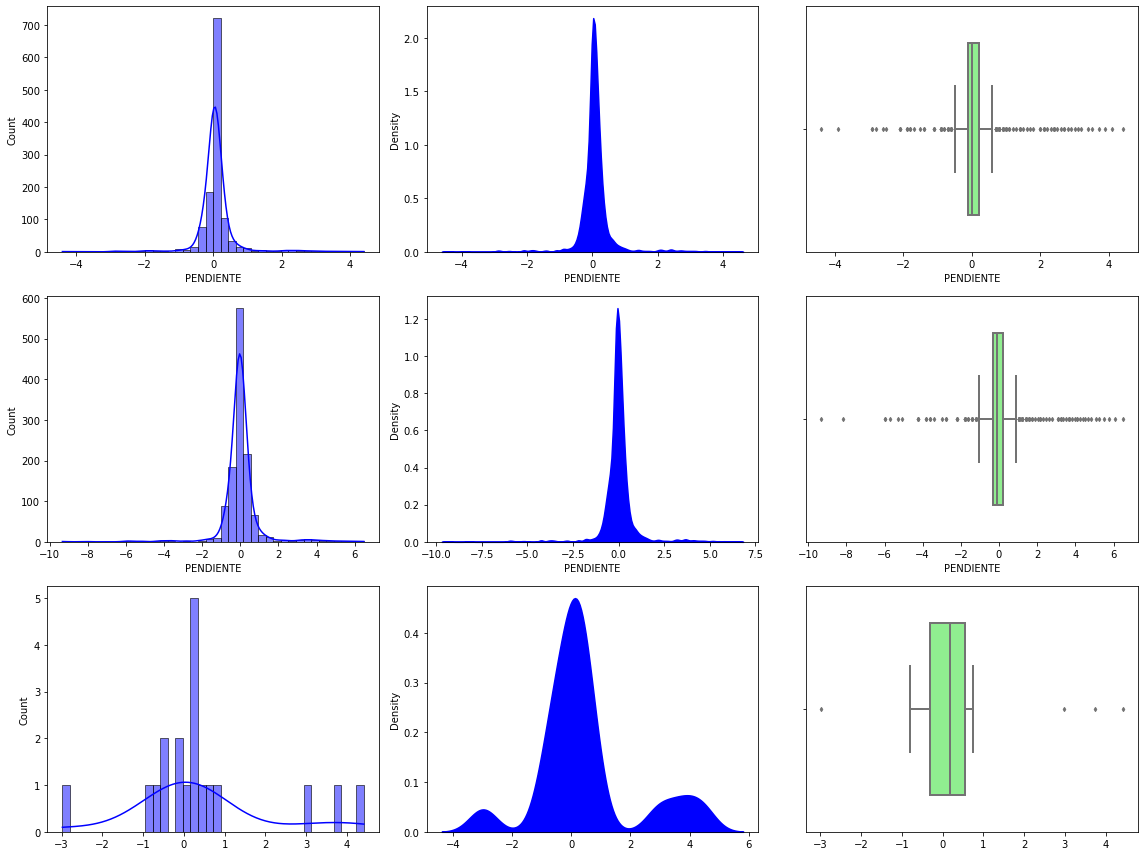

In [142]:
# Estudio Visualización "PENDIENTE"
# Métricas PENDIENTE
print("      =======================================================================")
print(f"      =====     MEDIA DE PENDIENTE (Original):              {data['PENDIENTE'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE PENDIENTE (Sin sesgo):            {new_data['PENDIENTE'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE PENDIENTE (Estandarizada):         {standarizacion[15].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE PENDIENTE (Original):            {data['PENDIENTE'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE PENDIENTE (Sin sesgo):          {new_data['PENDIENTE'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE PENDIENTE (Estandarizada):       -------     =====")
print(f"      =====     SESGO DE PENDIENTE (Original):              {data['PENDIENTE'].skew():,.5f}     =====")
print(f"      =====     SESGO DE PENDIENTE (Sin sesgo):            {new_data['PENDIENTE'].skew():,.5f}     =====")
print(f"      =====     SESGO DE PENDIENTE (Estandarizada):         -------     =====")
print(f"      =====     VARIANZA DE PENDIENTE (Original):           {data['PENDIENTE'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE PENDIENTE (Sin sesgo):          {new_data['PENDIENTE'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE PENDIENTE (Estandarizada):      {standarizacion[15].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['PENDIENTE'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                     {new_data['PENDIENTE'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de PENDIENTE
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["PENDIENTE"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["PENDIENTE"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["PENDIENTE"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["PENDIENTE"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["PENDIENTE"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["PENDIENTE"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[15],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[15],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[15], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="ALTITUD"></a>
# <font color="#004D7F">Nueva Visualización ALTITUD</font>

      =====     MEDIA DE ALTITUD (Original):               20.84784     =====
      =====     MEDIA DE ALTITUD (Sin sesgo):              -0.00000     =====
      =====     MEDIA DE ALTITUD (Estandarizada):           0.18836     =====
      =====     MEDIANA DE ALTITUD (Original):             18.00000     =====
      =====     MEDIANA DE ALTITUD (Sin sesgo):             0.05261     =====
      =====     MEDIANA DE ALTITUD (Estandarizada):         -------     =====
      =====     SESGO DE ALTITUD (Original):                8.09177     =====
      =====     SESGO DE ALTITUD (Sin sesgo):              -0.12287     =====
      =====     SESGO DE ALTITUD (Estandarizada):           -------     =====
      =====     VARIANZA DE ALTITUD (Original):            22.84551     =====
      =====     VARIANZA DE ALTITUD (Sin sesgo):            1.00041     =====
      =====     VARIANZA DE ALTITUD (Estandarizada):        0.49089     =====
      =====     KOURTOSIS (Original):                      69.85

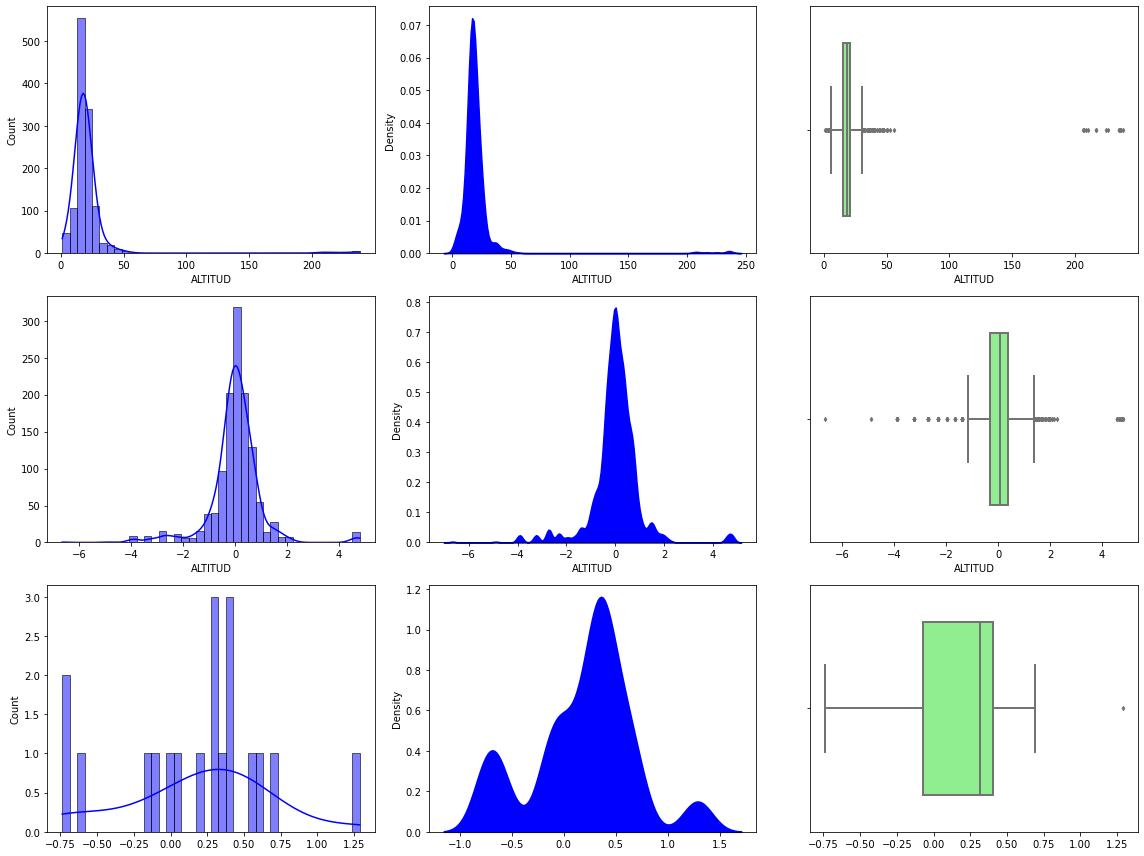

In [127]:
# Estudio Visualización "ALTITUD"
# Métricas ALTITUD
print("      =======================================================================")
print(f"      =====     MEDIA DE ALTITUD (Original):               {data['ALTITUD'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE ALTITUD (Sin sesgo):              {new_data['ALTITUD'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE ALTITUD (Estandarizada):           {standarizacion[12].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE ALTITUD (Original):             {data['ALTITUD'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE ALTITUD (Sin sesgo):             {new_data['ALTITUD'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE ALTITUD (Estandarizada):         -------     =====")
print(f"      =====     SESGO DE ALTITUD (Original):                {data['ALTITUD'].skew():,.5f}     =====")
print(f"      =====     SESGO DE ALTITUD (Sin sesgo):              {new_data['ALTITUD'].skew():,.5f}     =====")
print(f"      =====     SESGO DE ALTITUD (Estandarizada):           -------     =====")
print(f"      =====     VARIANZA DE ALTITUD (Original):            {data['ALTITUD'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE ALTITUD (Sin sesgo):            {new_data['ALTITUD'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE ALTITUD (Estandarizada):        {standarizacion[12].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['ALTITUD'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['ALTITUD'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de ALTITUD
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["ALTITUD"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["ALTITUD"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["ALTITUD"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["ALTITUD"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["ALTITUD"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["ALTITUD"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[12],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[12],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[12], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="DESNIVEL"></a>
# <font color="#004D7F">Nueva Visualización DESNIVEL</font>

      =====     MEDIA DE DESNIVEL (Original):               8.60781     =====
      =====     MEDIA DE DESNIVEL (Sin sesgo):              0.00000     =====
      =====     MEDIA DE DESNIVEL (Estandarizada):         -0.00362     =====
      =====     MEDIANA DE DESNIVEL (Original):             6.00000     =====
      =====     MEDIANA DE DESNIVEL (Sin sesgo):           -0.06182     =====
      =====     MEDIANA DE DESNIVEL (Estandarizada):        -------     =====
      =====     SESGO DE DESNIVEL (Original):               2.81566     =====
      =====     SESGO DE DESNIVEL (Sin sesgo):             -0.00284     =====
      =====     SESGO DE DESNIVEL (Estandarizada):          -------     =====
      =====     VARIANZA DE DESNIVEL (Original):            8.52888     =====
      =====     VARIANZA DE DESNIVEL (Sin sesgo):           1.00041     =====
      =====     VARIANZA DE DESNIVEL (Estandarizada):       0.35556     =====
      =====     KOURTOSIS (Original):                      10.50

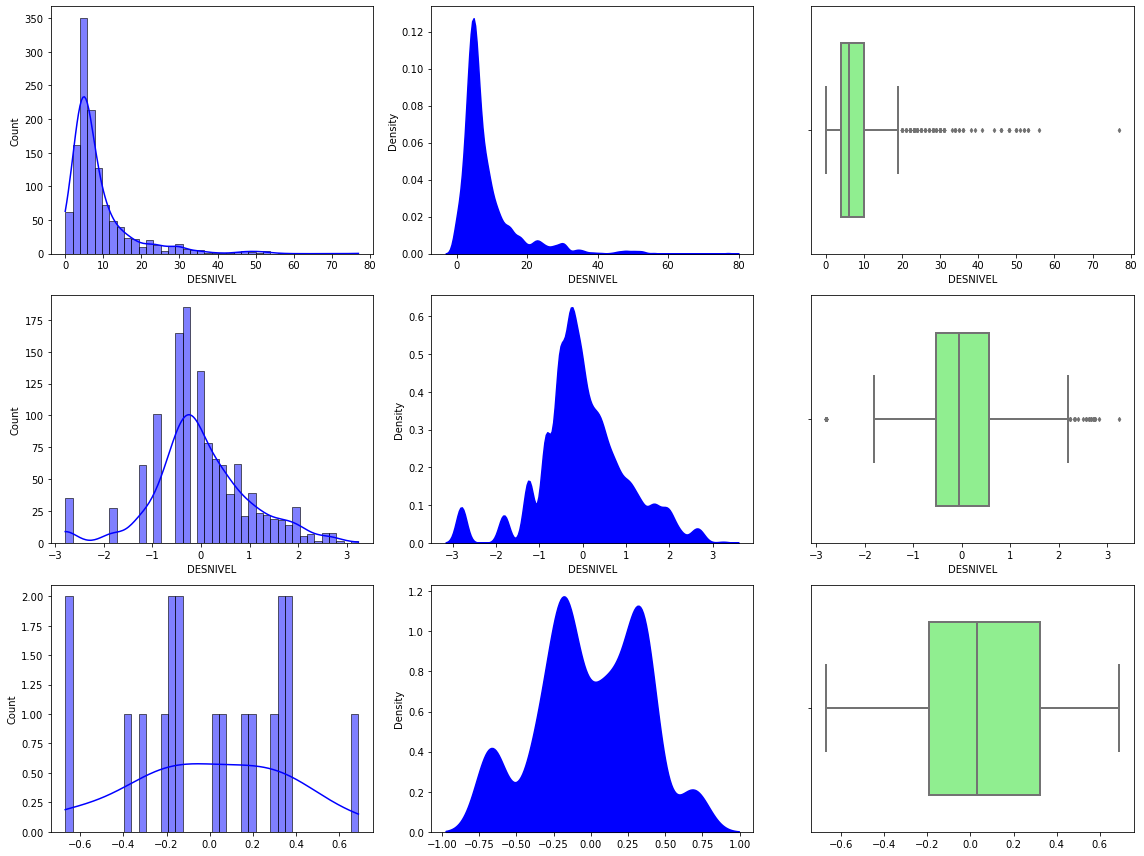

In [146]:
# Estudio Visualización "DESNIVEL"
# Métricas DESNIVEL
print("      =======================================================================")
print(f"      =====     MEDIA DE DESNIVEL (Original):               {data['DESNIVEL'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE DESNIVEL (Sin sesgo):              {new_data['DESNIVEL'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE DESNIVEL (Estandarizada):         {standarizacion[16].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE DESNIVEL (Original):             {data['DESNIVEL'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE DESNIVEL (Sin sesgo):           {new_data['DESNIVEL'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE DESNIVEL (Estandarizada):        -------     =====")
print(f"      =====     SESGO DE DESNIVEL (Original):               {data['DESNIVEL'].skew():,.5f}     =====")
print(f"      =====     SESGO DE DESNIVEL (Sin sesgo):             {new_data['DESNIVEL'].skew():,.5f}     =====")
print(f"      =====     SESGO DE DESNIVEL (Estandarizada):          -------     =====")
print(f"      =====     VARIANZA DE DESNIVEL (Original):            {data['DESNIVEL'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE DESNIVEL (Sin sesgo):           {new_data['DESNIVEL'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE DESNIVEL (Estandarizada):       {standarizacion[16].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['DESNIVEL'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['DESNIVEL'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de DESNIVEL
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["DESNIVEL"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["DESNIVEL"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["DESNIVEL"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["DESNIVEL"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["DESNIVEL"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["DESNIVEL"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[16],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[16],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[16], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="RSS"></a>
# <font color="#004D7F">Nueva Visualización RSS</font>

      =====     MEDIA DE RSS (Original):                   11.62653     =====
      =====     MEDIA DE RSS (Sin sesgo):                   0.00000     =====
      =====     MEDIA DE RSS (Estandarizada):               0.21568     =====
      =====     MEDIANA DE RSS (Original):                  8.00000     =====
      =====     MEDIANA DE RSS (Sin sesgo):                -0.04980     =====
      =====     MEDIANA DE RSS (Estandarizada):             -------     =====
      =====     SESGO DE RSS (Original):                    3.01400     =====
      =====     SESGO DE RSS (Sin sesgo):                  -0.03096     =====
      =====     SESGO DE RSS (Estandarizada):               -------     =====
      =====     VARIANZA DE RSS (Original):                11.19008     =====
      =====     VARIANZA DE RSS (Sin sesgo):                1.00041     =====
      =====     VARIANZA DE RSS (Estandarizada):            0.55574     =====
      =====     KOURTOSIS (Original):                      11.54

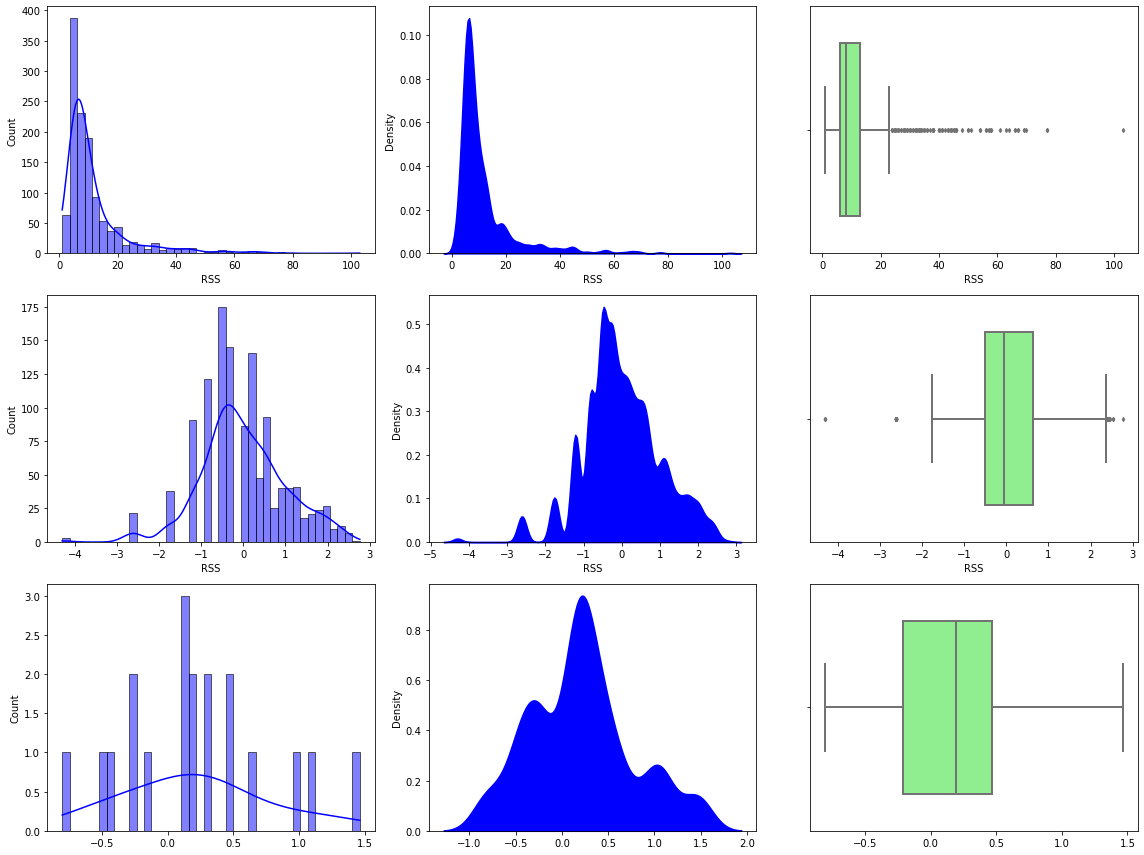

In [131]:
# Estudio Visualización "RSS"
# Métricas RSS
print("      =======================================================================")
print(f"      =====     MEDIA DE RSS (Original):                   {data['RSS'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RSS (Sin sesgo):                   {new_data['RSS'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE RSS (Estandarizada):               {standarizacion[13].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE RSS (Original):                  {data['RSS'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RSS (Sin sesgo):                {new_data['RSS'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE RSS (Estandarizada):             -------     =====")
print(f"      =====     SESGO DE RSS (Original):                    {data['RSS'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RSS (Sin sesgo):                  {new_data['RSS'].skew():,.5f}     =====")
print(f"      =====     SESGO DE RSS (Estandarizada):               -------     =====")
print(f"      =====     VARIANZA DE RSS (Original):                {data['RSS'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RSS (Sin sesgo):                {new_data['RSS'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE RSS (Estandarizada):            {standarizacion[13].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                      {data['RSS'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['RSS'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de RSS
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["RSS"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["RSS"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["RSS"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["RSS"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["RSS"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["RSS"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[13],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[13],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[13], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="DURACION"></a>
# <font color="#004D7F">Nueva Visualización DURACION</font>

      =====     MEDIA DE DURACION (Original):             771.56306     =====
      =====     MEDIA DE DURACION (Sin sesgo):            771.56306     =====
      =====     MEDIA DE DURACION (Estandarizada):         -0.01740     =====
      =====     MEDIANA DE DURACION (Original):           520.00000     =====
      =====     MEDIANA DE DURACION (Sin sesgo):          520.00000     =====
      =====     MEDIANA DE DURACION (Estandarizada):        -------     =====
      =====     SESGO DE DURACION (Original):               2.45963     =====
      =====     SESGO DE DURACION (Sin sesgo):              2.45963     =====
      =====     SESGO DE DURACION (Estandarizada):          -------     =====
      =====     VARIANZA DE DURACION (Original):          686.14350     =====
      =====     VARIANZA DE DURACION (Sin sesgo):         686.14350     =====
      =====     VARIANZA DE DURACION (Estandarizada):       1.19813     =====
      =====     KOURTOSIS (Original):                       6.38

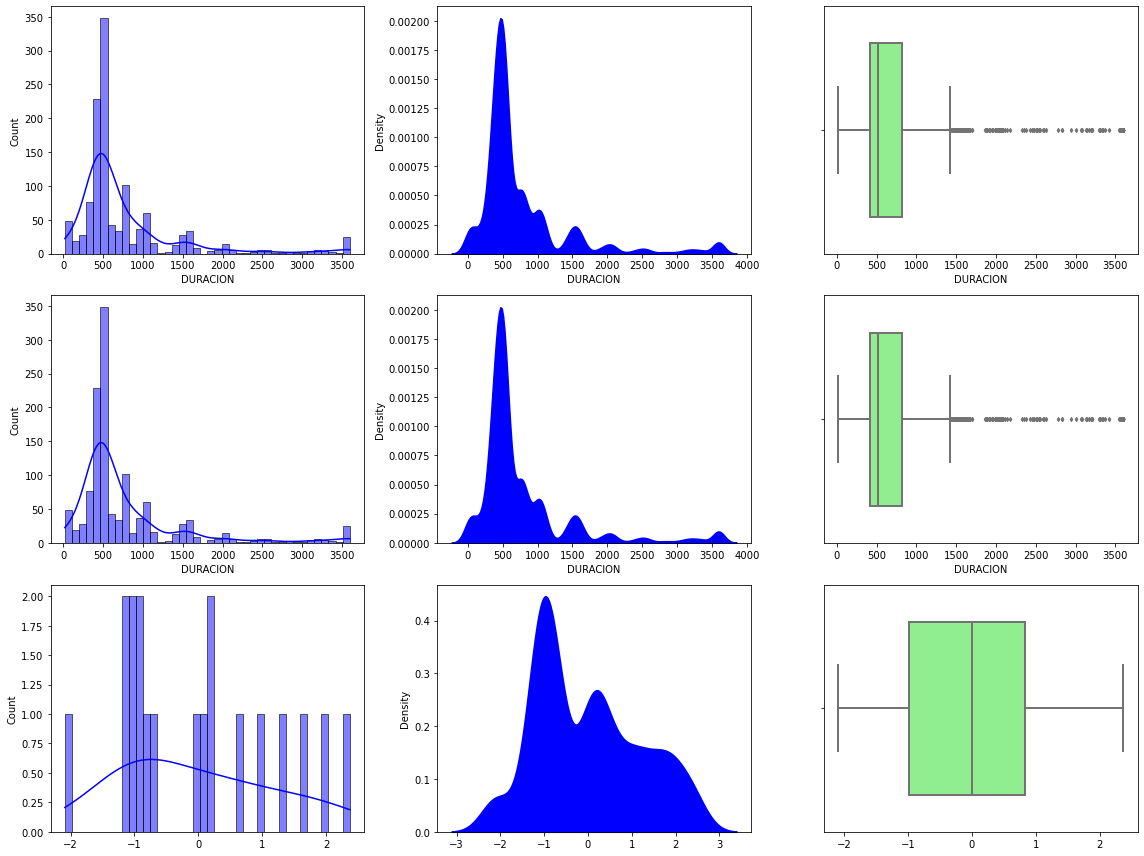

In [170]:
# Estudio Visualización "DURACION"
# Métricas DURACION
print("      =======================================================================")
print(f"      =====     MEDIA DE DURACION (Original):             {data['DURACION'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE DURACION (Sin sesgo):            {new_data['DURACION'].mean():,.5f}     =====")
print(f"      =====     MEDIA DE DURACION (Estandarizada):         {standarizacion[19].mean():,.5f}     =====")
print(f"      =====     MEDIANA DE DURACION (Original):           {data['DURACION'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE DURACION (Sin sesgo):          {new_data['DURACION'].median():,.5f}     =====")
print(f"      =====     MEDIANA DE DURACION (Estandarizada):        -------     =====")
print(f"      =====     SESGO DE DURACION (Original):               {data['DURACION'].skew():,.5f}     =====")
print(f"      =====     SESGO DE DURACION (Sin sesgo):              {new_data['DURACION'].skew():,.5f}     =====")
print(f"      =====     SESGO DE DURACION (Estandarizada):          -------     =====")
print(f"      =====     VARIANZA DE DURACION (Original):          {data['DURACION'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE DURACION (Sin sesgo):         {new_data['DURACION'].std():,.5f}     =====")
print(f"      =====     VARIANZA DE DURACION (Estandarizada):       {standarizacion[19].std():,.5f}     =====")
print(f"      =====     KOURTOSIS (Original):                       {data['DURACION'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Sin sesgo):                      {new_data['DURACION'].kurt():,.5f}     =====")
print(f"      =====     KOURTOSIS (Estandarizada):                  -------     =====")
print("      =======================================================================")

# Visualización Histograma, Densidad y Boxplot de DURACION
f, axes = plt.subplots(3,3, figsize =(16,12))
# datos originales
sns.histplot(data["DURACION"],          ax = axes [0,0], kde = True, bins = 40, color = "Blue", fill = True)

sns.kdeplot(data["DURACION"],           ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = data["DURACION"],       ax = axes [0,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos sin sesgo
sns.histplot(new_data["DURACION"],      ax = axes [1,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(new_data["DURACION"],       ax = axes [1,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = new_data["DURACION"],   ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
# datos estandarizados
sns.histplot(standarizacion[19],    ax = axes [2,0], kde = True, bins = 40, color = "Blue", fill = True)
sns.kdeplot(standarizacion[19],     ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                   bw_adjust = .5, clip_on = False, alpha = 1, linewidth = 1.5)
sns.boxplot(x = standarizacion[19], ax = axes [2,2], orient = "h", color = "lightgreen", saturation = 1,
                                   width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---